In [1]:
###########tensoflow로 bmi 판정 ##################################
import pandas as pd
import numpy as np
import tensorflow as tf

df = pd.read_csv("C:/Users/student/Desktop/dataset/dataset/bmi.csv")

#키와 몸무게 정규화
df["height"] = df["height"] / 200
df["weight"] = df["weight"] / 100

#label 컬럼 변환 - thin[1, 0, 0]/normal[0, 1, 0]/fat [0, 0, 1]
bclass = {"thin": [1, 0, 0] , "normal":[0, 1, 0], "fat": [0, 0, 1]}
df["label_pat"] = df["label"].apply(lambda x: np.array(bclass[x]))

#학습데이터와 테스트 데이터 분류
test_df = df[15000:20000]
test_pat= test_df[["weight", "height"]]
test_ans = list(test_df["label_pat"])

X = tf.placeholder(tf.float32, [None, 2]) #키, 몸부게 데이터 담을 placeholder  선언
Y = tf.placeholder(tf.float32, [None, 3])   #정답 레이블 데이터 담을 placeholder  선언

W = tf.Variable(tf.zeros([2, 3])) 
b = tf.Variable(tf.zeros([3])) 

y = tf.nn.softmax(tf.matmul(X, W) + b)  #소프트맥스 회귀 정의
cross_entropy = -tf.reduce_sum(Y * tf.log(y))  #오차함수 - 교차 엔트로피
train= tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)  #경사하강법으로 학습
 
#예측값, 정답률 계산
predict = tf.equal(tf.argmax(y, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(predict, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer()) 
for step in range(3501):
    i = (step*100) % 14000
    rows = df[i+1:i+1+100]
    x_pat = rows[["weight", "height"]]
    y_ans =  list(rows["label_pat"])
    sess.run(train, feed_dict={X: x_pat  , Y: y_ans })
    if step%500  == 0 :
        cre = sess.run(cross_entropy, feed_dict={X: x_pat  , Y: y_ans })
        acc = sess.run(accuracy , feed_dict={X: test_pat  , Y: test_ans })
        print("Epoch=", step, "오차=", cre, "정확률(평균)=", acc)


Epoch= 0 오차= 108.66269 정확률(평균)= 0.3242
Epoch= 500 오차= 57.58866 정확률(평균)= 0.8904
Epoch= 1000 오차= 45.020916 정확률(평균)= 0.898
Epoch= 1500 오차= 41.654335 정확률(평균)= 0.9566
Epoch= 2000 오차= 34.664024 정확률(평균)= 0.943
Epoch= 2500 오차= 34.287025 정확률(평균)= 0.9674
Epoch= 3000 오차= 26.880762 정확률(평균)= 0.9726
Epoch= 3500 오차= 29.590666 정확률(평균)= 0.9728


In [2]:
###########keras + tensofow로 bmi 판정 ##################################
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping


df = pd.read_csv("C:/Users/student/Desktop/dataset/dataset/bmi.csv")

#키와 몸무게 정규화
df["height"] /= 200
df["weight"] /= 100

X = df[["weight", "height"]].as_matrix()

#label 컬럼 변환 - thin[1, 0, 0]/normal[0, 1, 0]/fat [0, 0, 1]
bclass = {"thin": [1, 0, 0] , "normal":[0, 1, 0], "fat": [0, 0, 1]}
Y = np.empty((20000, 3))
for i, v in enumerate(df["label"]):
    Y[i] = bclass[v]
 
##학습데이터 , 테스트 데이터 분리
X_train, Y_train = X[1:15001], Y[1:15001]
X_test, Y_test = X[15001:20001], Y[15001:20001]

model = Sequential()  #모델 객체 생성
model.add(Dense(512, input_shape=(2, )))    #Dense(노드 수 , ....) 층을 의미하는 객체
model.add(Activation('relu'))   # 활성화 함수
model.add(Dropout(0.1))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(3)) # 분류하고 싶은 클래스 수 만큼 출력으로 구성
model.add(Activation('softmax'))  #활성화 함수

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=['accuracy'])
hist = model.fit(X_train, Y_train, batch_size=100, nb_epoch=20, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=2)], verbose=1)
                    
score = model.evaluate(X_test, Y_test)
print("loss=", score[0])
print("accuracy=", score[1])



# weight decay( 가중치 감소) - 학습중 가중치가 큰 것에 대해서 패널티를 부과해 과적합의 위험을 줄이는 방법
# Dropout - 복잡한 신경망에서 가중치 감소만으로 과적합을 피하기 어려운 경우 뉴런의 연결을 임의로 삭제시켜 신호를 전달하지 못하도록 하는 방법
# softmax 회귀 - 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하여 출력값들의 총합은 항상 1이 되는 특성의 함수



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.
C:\Users\student\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
C:\Users\student\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:39: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.





Train on 13500 samples, validate on 1500 samples
Epoch 1/20
13500/13500 [==============================] - 1s 53us/step - loss: 0.4957 - accuracy: 0.8049 - val_loss: 0.2890 - val_accuracy: 0.8833
Epoch 2/20
13500/13500 [==============================] - 1s 46us/step - loss: 0.2401 - accuracy: 0.9073 - val_loss: 0.1770 - val_accuracy: 0.9313
Epoch 3/20
13500/13500 [==============================] - 1s 38us/step - loss: 0.1898 - accuracy: 0.9187 - val_loss: 0.1961 - val_accuracy: 0.8993
Epoch 4/20
13500/13500 [==============================] - 0s 35us/step - loss: 0.1678 - accuracy: 0.9281 - val_loss: 0.0938 - val_accuracy: 0.9867
Epoch 5/20
13500/13500 [==============================] - 0s 36us/step - loss: 0.1506 - accuracy: 0.9341 - val_loss: 0.2027 - val_accuracy: 0.8980
Epoch 6/20
4999/4999 [==============================] - 0s 15us/step
loss= 0.10760879728836545
accuracy= 0.9483896493911743


In [3]:

##############폐암수술 환자 예측 분석 모델 #################
# 필요한 라이브러리를 불러옵니다.
import numpy
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

# 준비된 수술 환자 데이터를 불러들입니다.
Data_set = numpy.loadtxt("C:/Users/student/Desktop/dataset/dataset/ThoraricSurgery.csv", delimiter=",")

# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장합니다.
X = Data_set[:,0:17]
Y = Data_set[:,17]

# 딥러닝 구조를 결정합니다(모델을 설정하고 실행).
model = Sequential()   
# 첫 번째 은닉층에 input_dim을 적어 줌으로써 첫 번째 Dense가 은닉층 + 입력층의 역할을 겸합니다.
# 데이터에서 17개의 값을 받아 은닉층의 30개 노드로 보낸다 
model.add(Dense(30, input_dim=17, activation='relu'))  #activation : 출력층으로 전달할 때 사용할 활성화 함수
model.add(Dense(1, activation='sigmoid'))  #출력층의 노드 수는 1개, 최종 출력 값에 사용될 활성화 함수

# 딥러닝을 실행합니다. (오차 함수 :  평균 제곱 오차 함수 사용)
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(X, Y, epochs=30, batch_size=10)

# 결과를 출력합니다.
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/30
470/470 [==============================] - 0s 178us/step - loss: 0.6653 - accuracy: 0.3106
Epoch 2/30
470/470 [==============================] - 0s 36us/step - loss: 0.1488 - accuracy: 0.8511
Epoch 3/30
470/470 [==============================] - 0s 66us/step - loss: 0.1488 - accuracy: 0.8511
Epoch 4/30
470/470 [==============================] - 0s 66us/step - loss: 0.1488 - accuracy: 0.8511
Epoch 5/30
470/470 [==============================] - 0s 66us/step - loss: 0.1488 - accuracy: 0.8511
Epoch 6/30
470/470 [==============================] - 0s 66us/step - loss: 0.1487 - accuracy: 0.8511
Epoch 7/30
470/470 [==============================] - 0s 66us/step - loss: 0.1487 - accuracy: 0.8511
Epoch 8/30
470/470 [==============================] - 0s 33us/step - loss: 0.1487 - accuracy: 0.8511
Epoch 9/30
470/470 [==============================] - 0s 66us/step - loss: 0.1487 - accuracy: 0.8511
Epoch 10/30
470/470 [==============================] - 0s 67us/step - loss: 0.1486 - accur

In [4]:
###################################################
from keras.models import Sequential
from keras.layers import Dense
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed)                   # seed 값 생성
tf.set_random_seed(seed)

dataset = numpy.loadtxt("C:/Users/student/Desktop/dataset/dataset/pima-indians-diabets.csv", delimiter=",")               # 데이터 로드
X = dataset[:,0:8]
Y = dataset[:,8]

model = Sequential()                                                # 모델의 설정
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',   optimizer='adam',      metrics=['accuracy'])   # 모델 컴파일
model.fit(X, Y, epochs=200, batch_size=10)                                # 모델 실행
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))                # 결과 출력

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/200
768/768 [==============================] - 0s 167us/step - loss: 2.4394 - accuracy: 0.5130
Epoch 2/200
768/768 [==============================] - 0s 61us/step - loss: 0.9124 - accuracy: 0.6367
Epoch 3/200
768/768 [==============================] - 0s 81us/step - loss: 0.7962 - accuracy: 0.6393
Epoch 4/200
768/768 [==============================] - 0s 61us/step - loss: 0.7415 - accuracy: 0.6107
Epoch 5/200
768/768 [==============================] - 0s 87us/step - loss: 0.6802 - accuracy: 0.6406
Epoch 6/200
768/768 [==============================] - 0s 62us/step - loss: 0.6489 - accuracy: 0.6315
Epoch 7/200
768/768 [==============================] - 0s 61us/step - loss: 0.6379 - accuracy: 0.6445
Epoch 8/200
768/768 [==============================] - 0s 81us/step - loss: 0.6383 - accuracy: 0.6250
Epoch 9/200
768/768 [==============================] - 0s 81us/step - loss: 0.6306 - accu

768/768 [==============================] - 0s 61us/step - loss: 0.5180 - accuracy: 0.7422
Epoch 78/200
768/768 [==============================] - 0s 81us/step - loss: 0.5110 - accuracy: 0.7396
Epoch 79/200
768/768 [==============================] - 0s 61us/step - loss: 0.5126 - accuracy: 0.7591
Epoch 80/200
768/768 [==============================] - 0s 81us/step - loss: 0.5085 - accuracy: 0.7474
Epoch 81/200
768/768 [==============================] - 0s 61us/step - loss: 0.5165 - accuracy: 0.7435
Epoch 82/200
768/768 [==============================] - 0s 81us/step - loss: 0.5024 - accuracy: 0.7578
Epoch 83/200
768/768 [==============================] - 0s 63us/step - loss: 0.5193 - accuracy: 0.7383
Epoch 84/200
768/768 [==============================] - 0s 61us/step - loss: 0.5044 - accuracy: 0.7461
Epoch 85/200
768/768 [==============================] - 0s 81us/step - loss: 0.5043 - accuracy: 0.7526
Epoch 86/200
768/768 [==============================] - 0s 61us/step - loss: 0.5094 - 

768/768 [==============================] - 0s 81us/step - loss: 0.4728 - accuracy: 0.7799
Epoch 157/200
768/768 [==============================] - 0s 61us/step - loss: 0.4789 - accuracy: 0.7747
Epoch 158/200
768/768 [==============================] - 0s 61us/step - loss: 0.4666 - accuracy: 0.7747
Epoch 159/200
768/768 [==============================] - 0s 81us/step - loss: 0.4721 - accuracy: 0.7604
Epoch 160/200
768/768 [==============================] - 0s 66us/step - loss: 0.4703 - accuracy: 0.7617
Epoch 161/200
768/768 [==============================] - 0s 61us/step - loss: 0.4717 - accuracy: 0.7695
Epoch 162/200
768/768 [==============================] - 0s 61us/step - loss: 0.4692 - accuracy: 0.7812
Epoch 163/200
768/768 [==============================] - 0s 81us/step - loss: 0.4678 - accuracy: 0.7643
Epoch 164/200
768/768 [==============================] - 0s 61us/step - loss: 0.4687 - accuracy: 0.7786
Epoch 165/200
768/768 [==============================] - 0s 61us/step - loss: 

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


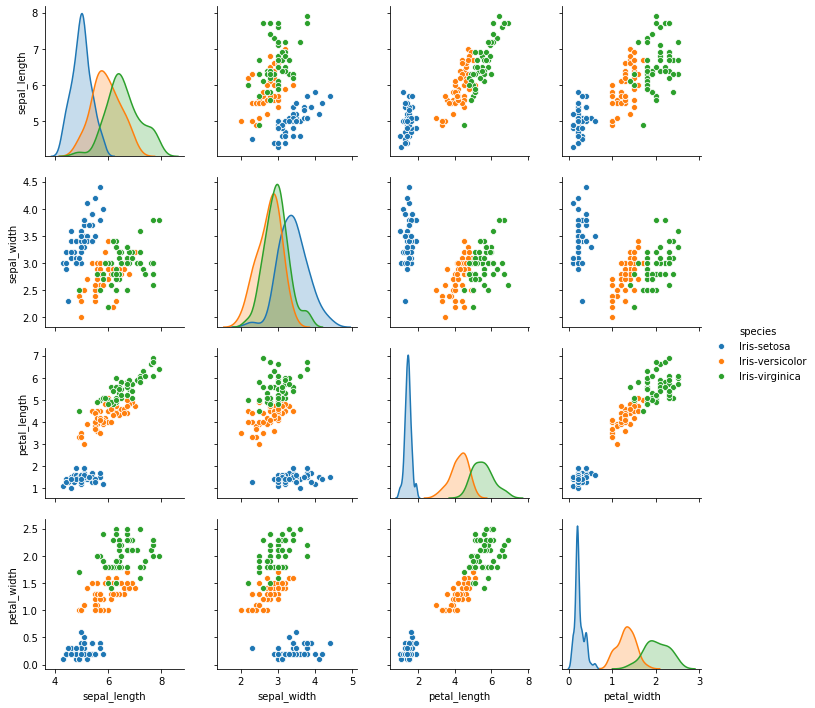

In [5]:
####################다중  분류 분석 딥러닝으로 학습 ###############################
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/student/Desktop/dataset/dataset/iris.csv", names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
print(df.head())

sns.pairplot(df, hue='species')  #속성별 연관성 파악
plt.show()

dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

from sklearn.preprocessing import LabelEncoder     
e = LabelEncoder()     # array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])가 array([1,2,3])로 변환
e.fit(Y_obj)
Y = e.transform(Y_obj)

from keras.utils import np_utils
# array([1,2,3])가 다시 array([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]])로 원-핫 인코딩(one-hot-encoding) 변환
Y_encoded = np_utils.to_categorical(Y)



In [6]:
################################################초음파 광물 분석########################################################
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed)        # seed 값 설정
tf.set_random_seed(seed)

df = pd.read_csv('C:/Users/student/Desktop/dataset/dataset/sonar.csv', header=None)           # 데이터 입력
dataset = df.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]
#print(Y_obj.unique())

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)            # 문자열 변환

model = Sequential()              # 모델 설정
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',   optimizer='adam',    metrics=['accuracy'])  # 모델 컴파일
model.fit(X, Y, epochs=200, batch_size=5)                      # 모델 실행
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))     # 결과 출력

Epoch 1/200
208/208 [==============================] - 0s 479us/step - loss: 0.2532 - accuracy: 0.4471
Epoch 2/200
208/208 [==============================] - 0s 82us/step - loss: 0.2457 - accuracy: 0.5385
Epoch 3/200
208/208 [==============================] - 0s 150us/step - loss: 0.2428 - accuracy: 0.5385
Epoch 4/200
208/208 [==============================] - 0s 150us/step - loss: 0.2402 - accuracy: 0.5385
Epoch 5/200
208/208 [==============================] - 0s 150us/step - loss: 0.2349 - accuracy: 0.5433
Epoch 6/200
208/208 [==============================] - 0s 225us/step - loss: 0.2285 - accuracy: 0.5529
Epoch 7/200
208/208 [==============================] - 0s 150us/step - loss: 0.2207 - accuracy: 0.6250
Epoch 8/200
208/208 [==============================] - 0s 150us/step - loss: 0.2162 - accuracy: 0.6298
Epoch 9/200
208/208 [==============================] - 0s 150us/step - loss: 0.2021 - accuracy: 0.7067
Epoch 10/200
208/208 [==============================] - 0s 150us/step - lo

208/208 [==============================] - 0s 150us/step - loss: 0.0628 - accuracy: 0.9327
Epoch 80/200
208/208 [==============================] - 0s 151us/step - loss: 0.0624 - accuracy: 0.9375
Epoch 81/200
208/208 [==============================] - 0s 151us/step - loss: 0.0620 - accuracy: 0.9375
Epoch 82/200
208/208 [==============================] - 0s 152us/step - loss: 0.0612 - accuracy: 0.9375
Epoch 83/200
208/208 [==============================] - 0s 148us/step - loss: 0.0602 - accuracy: 0.9183
Epoch 84/200
208/208 [==============================] - 0s 155us/step - loss: 0.0624 - accuracy: 0.9279
Epoch 85/200
208/208 [==============================] - 0s 154us/step - loss: 0.0607 - accuracy: 0.9279
Epoch 86/200
208/208 [==============================] - 0s 151us/step - loss: 0.0584 - accuracy: 0.9375
Epoch 87/200
208/208 [==============================] - 0s 149us/step - loss: 0.0563 - accuracy: 0.9519
Epoch 88/200
208/208 [==============================] - 0s 151us/step - loss:

208/208 [==============================] - 0s 151us/step - loss: 0.0168 - accuracy: 0.9904
Epoch 158/200
208/208 [==============================] - 0s 120us/step - loss: 0.0182 - accuracy: 0.9904
Epoch 159/200
208/208 [==============================] - 0s 125us/step - loss: 0.0154 - accuracy: 0.9904
Epoch 160/200
208/208 [==============================] - 0s 145us/step - loss: 0.0147 - accuracy: 0.9904
Epoch 161/200
208/208 [==============================] - 0s 147us/step - loss: 0.0145 - accuracy: 0.9904
Epoch 162/200
208/208 [==============================] - 0s 147us/step - loss: 0.0146 - accuracy: 0.9904
Epoch 163/200
208/208 [==============================] - 0s 157us/step - loss: 0.0146 - accuracy: 0.9904
Epoch 164/200
208/208 [==============================] - 0s 152us/step - loss: 0.0140 - accuracy: 0.9904
Epoch 165/200
208/208 [==============================] - 0s 154us/step - loss: 0.0136 - accuracy: 0.9904
Epoch 166/200
208/208 [==============================] - 0s 154us/ste

In [7]:
#학습 데이터와 테스트 데이터가 중복되면 과적합이 발생합니다.#########################################
#데이터를 7:3의 비율로 랜덤하게 학습 데이터와 테스트 데이터로 분리해서 모델을 학습시키고 정확도를 측정합니다.
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed)        # seed 값 설정
tf.set_random_seed(seed)

df = pd.read_csv('C:/Users/student/Desktop/dataset/dataset/sonar.csv', header=None)           # 데이터 입력
dataset = df.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)            # 문자열 변환

# 학습셋과 테스트셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',   optimizer='adam',     metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=130, batch_size=5)

# 테스트셋에 모델 적용
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

NameError: name 'train_test_split' is not defined

In [ ]:

####################데이터 샘플이 적은 경우 : k-겹 교차 검증########################################################
# 10개의 파일로 쪼개 테스트하는?10-fold cross validation을 실시하도록?n_fold의 값을 10으로 설정한 뒤?StratifiedKFold()?함수에 적용했습니다. 그런 다음 모델을 만들고 실행하는 부분을?for?구문으로 묶어?n_fold만큼 반복되게 합니다.
from keras.models import Sequential 
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed)        # seed 값 설정
tf.set_random_seed(seed)

df = pd.read_csv('C:/Users/student/Desktop/dataset/dataset/sonar.csv', header=None)           # 데이터 입력
dataset = df.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)            # 문자열 변환


from sklearn.model_selection import StratifiedKFold

n_fold = 10  #10겹 
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

accuracy = []  # 빈 accuracy 배열

for train, test in skf.split(X, Y):  # 모델의 설정, 컴파일, 실행
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error',  optimizer='adam',   metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5)
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)

# 결과 출력

In [9]:


#################그래프로 학습 확인하기#############################

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
import os

seed = 0
numpy.random.seed(seed)  # seed 값 설정
tf.set_random_seed(seed)

df_pre = pd.read_csv('C:/Users/student/Desktop/dataset/dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.15)  #rac = 1 지정은 원본 데이터의 100%를 불러오라는 의미
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

model = Sequential() # 모델 설정(4개의 은닉층을 만들어 각각 30, 12, 8, 1개의 노드를 주었습니다)
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
from keras.callbacks import ModelCheckpoint

# 모델 컴파일
model.compile(loss='binary_crossentropy',   optimizer='adam',    metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

#테스트 오차는 케라스 내부에서 val_loss, 학습 정확도는 acc, 테스트셋 정확도는 val_acc, 학습셋 오차는 loss로 각각 기록됩니다
# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)


history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

# y_vloss에 테스트셋(33%)으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc에 학습셋(67%)으로 측정한 정확도의 값을 저장
y_acc=history.history['acc']

# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()




Train on 653 samples, validate on 322 samples
Epoch 1/3500
653/653 [==============================] - 0s 223us/step - loss: 0.5552 - accuracy: 0.7596 - val_loss: 0.4822 - val_accuracy: 0.7826
Epoch 2/3500
653/653 [==============================] - 0s 8us/step - loss: 0.5047 - accuracy: 0.7596 - val_loss: 0.4472 - val_accuracy: 0.7826
Epoch 3/3500
653/653 [==============================] - 0s 8us/step - loss: 0.4690 - accuracy: 0.7580 - val_loss: 0.4211 - val_accuracy: 0.7826
Epoch 4/3500
653/653 [==============================] - 0s 8us/step - loss: 0.4381 - accuracy: 0.7596 - val_loss: 0.4086 - val_accuracy: 0.7733
Epoch 5/3500
653/653 [==============================] - 0s 8us/step - loss: 0.4206 - accuracy: 0.7565 - val_loss: 0.3961 - val_accuracy: 0.7764
Epoch 6/3500
653/653 [==============================] - 0s 8us/step - loss: 0.4015 - accuracy: 0.7626 - val_loss: 0.3766 - val_accuracy: 0.7888
Epoch 7/3500
653/653 [==============================] - 0s 8us/step - loss: 0.3853 - acc

653/653 [==============================] - 0s 8us/step - loss: 0.2044 - accuracy: 0.9296 - val_loss: 0.1979 - val_accuracy: 0.9441
Epoch 58/3500
653/653 [==============================] - 0s 6us/step - loss: 0.2039 - accuracy: 0.9296 - val_loss: 0.1971 - val_accuracy: 0.9472
Epoch 59/3500
653/653 [==============================] - 0s 8us/step - loss: 0.2030 - accuracy: 0.9280 - val_loss: 0.1968 - val_accuracy: 0.9503
Epoch 60/3500
653/653 [==============================] - 0s 6us/step - loss: 0.2024 - accuracy: 0.9280 - val_loss: 0.1958 - val_accuracy: 0.9503
Epoch 61/3500
653/653 [==============================] - 0s 6us/step - loss: 0.2017 - accuracy: 0.9280 - val_loss: 0.1953 - val_accuracy: 0.9441
Epoch 62/3500
653/653 [==============================] - 0s 6us/step - loss: 0.2004 - accuracy: 0.9296 - val_loss: 0.1942 - val_accuracy: 0.9472
Epoch 63/3500
653/653 [==============================] - 0s 8us/step - loss: 0.2000 - accuracy: 0.9296 - val_loss: 0.1934 - val_accuracy: 0.9472

653/653 [==============================] - 0s 8us/step - loss: 0.1784 - accuracy: 0.9326 - val_loss: 0.1830 - val_accuracy: 0.9472
Epoch 114/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1832 - accuracy: 0.9342 - val_loss: 0.1845 - val_accuracy: 0.9441
Epoch 115/3500
653/653 [==============================] - 0s 8us/step - loss: 0.1838 - accuracy: 0.9342 - val_loss: 0.1793 - val_accuracy: 0.9472
Epoch 116/3500
653/653 [==============================] - 0s 5us/step - loss: 0.1791 - accuracy: 0.9342 - val_loss: 0.1739 - val_accuracy: 0.9503
Epoch 117/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1772 - accuracy: 0.9387 - val_loss: 0.1766 - val_accuracy: 0.9503
Epoch 118/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1823 - accuracy: 0.9357 - val_loss: 0.1740 - val_accuracy: 0.9503
Epoch 119/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1777 - accuracy: 0.9372 - val_loss: 0.1759 - val_accuracy: 

653/653 [==============================] - 0s 5us/step - loss: 0.1579 - accuracy: 0.9387 - val_loss: 0.1577 - val_accuracy: 0.9472
Epoch 170/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1592 - accuracy: 0.9326 - val_loss: 0.1579 - val_accuracy: 0.9441
Epoch 171/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1583 - accuracy: 0.9326 - val_loss: 0.1542 - val_accuracy: 0.9503
Epoch 172/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1580 - accuracy: 0.9387 - val_loss: 0.1537 - val_accuracy: 0.9503
Epoch 173/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1564 - accuracy: 0.9387 - val_loss: 0.1562 - val_accuracy: 0.9472
Epoch 174/3500
653/653 [==============================] - 0s 8us/step - loss: 0.1567 - accuracy: 0.9326 - val_loss: 0.1611 - val_accuracy: 0.9503
Epoch 175/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1607 - accuracy: 0.9342 - val_loss: 0.1602 - val_accuracy: 

653/653 [==============================] - 0s 6us/step - loss: 0.1422 - accuracy: 0.9479 - val_loss: 0.1364 - val_accuracy: 0.9534
Epoch 226/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1379 - accuracy: 0.9372 - val_loss: 0.1427 - val_accuracy: 0.9503
Epoch 227/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1409 - accuracy: 0.9372 - val_loss: 0.1408 - val_accuracy: 0.9503
Epoch 228/3500
653/653 [==============================] - 0s 5us/step - loss: 0.1388 - accuracy: 0.9372 - val_loss: 0.1337 - val_accuracy: 0.9534
Epoch 229/3500
653/653 [==============================] - 0s 5us/step - loss: 0.1373 - accuracy: 0.9418 - val_loss: 0.1339 - val_accuracy: 0.9503
Epoch 230/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1423 - accuracy: 0.9449 - val_loss: 0.1322 - val_accuracy: 0.9503
Epoch 231/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1382 - accuracy: 0.9433 - val_loss: 0.1341 - val_accuracy: 

653/653 [==============================] - 0s 5us/step - loss: 0.1211 - accuracy: 0.9403 - val_loss: 0.1170 - val_accuracy: 0.9534
Epoch 282/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1220 - accuracy: 0.9479 - val_loss: 0.1165 - val_accuracy: 0.9534
Epoch 283/3500
653/653 [==============================] - 0s 8us/step - loss: 0.1204 - accuracy: 0.9449 - val_loss: 0.1208 - val_accuracy: 0.9534
Epoch 284/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1209 - accuracy: 0.9403 - val_loss: 0.1212 - val_accuracy: 0.9565
Epoch 285/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1210 - accuracy: 0.9403 - val_loss: 0.1175 - val_accuracy: 0.9534
Epoch 286/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1192 - accuracy: 0.9464 - val_loss: 0.1145 - val_accuracy: 0.9534
Epoch 287/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1205 - accuracy: 0.9449 - val_loss: 0.1143 - val_accuracy: 

653/653 [==============================] - 0s 6us/step - loss: 0.1066 - accuracy: 0.9556 - val_loss: 0.1029 - val_accuracy: 0.9627
Epoch 338/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1117 - accuracy: 0.9571 - val_loss: 0.1021 - val_accuracy: 0.9627
Epoch 339/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1079 - accuracy: 0.9556 - val_loss: 0.1057 - val_accuracy: 0.9565
Epoch 340/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1067 - accuracy: 0.9464 - val_loss: 0.1109 - val_accuracy: 0.9534
Epoch 341/3500
653/653 [==============================] - 0s 5us/step - loss: 0.1077 - accuracy: 0.9433 - val_loss: 0.1034 - val_accuracy: 0.9627
Epoch 342/3500
653/653 [==============================] - 0s 5us/step - loss: 0.1044 - accuracy: 0.9525 - val_loss: 0.1010 - val_accuracy: 0.9627
Epoch 343/3500
653/653 [==============================] - 0s 6us/step - loss: 0.1079 - accuracy: 0.9587 - val_loss: 0.1010 - val_accuracy: 

653/653 [==============================] - 0s 6us/step - loss: 0.0938 - accuracy: 0.9632 - val_loss: 0.0939 - val_accuracy: 0.9658
Epoch 394/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0934 - accuracy: 0.9602 - val_loss: 0.0919 - val_accuracy: 0.9658
Epoch 395/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0932 - accuracy: 0.9632 - val_loss: 0.0918 - val_accuracy: 0.9658
Epoch 396/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0929 - accuracy: 0.9632 - val_loss: 0.0938 - val_accuracy: 0.9689
Epoch 397/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0929 - accuracy: 0.9587 - val_loss: 0.0930 - val_accuracy: 0.9689
Epoch 398/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0926 - accuracy: 0.9617 - val_loss: 0.0912 - val_accuracy: 0.9658
Epoch 399/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0922 - accuracy: 0.9632 - val_loss: 0.0902 - val_accuracy: 

653/653 [==============================] - 0s 6us/step - loss: 0.0784 - accuracy: 0.9709 - val_loss: 0.0897 - val_accuracy: 0.9658
Epoch 450/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0794 - accuracy: 0.9694 - val_loss: 0.0815 - val_accuracy: 0.9689
Epoch 451/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0783 - accuracy: 0.9740 - val_loss: 0.0789 - val_accuracy: 0.9720
Epoch 452/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0786 - accuracy: 0.9724 - val_loss: 0.0836 - val_accuracy: 0.9658
Epoch 453/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0801 - accuracy: 0.9678 - val_loss: 0.0856 - val_accuracy: 0.9658
Epoch 454/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0798 - accuracy: 0.9724 - val_loss: 0.0798 - val_accuracy: 0.9720
Epoch 455/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0771 - accuracy: 0.9755 - val_loss: 0.0819 - val_accuracy: 

653/653 [==============================] - 0s 5us/step - loss: 0.0605 - accuracy: 0.9816 - val_loss: 0.0718 - val_accuracy: 0.9752
Epoch 506/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0590 - accuracy: 0.9801 - val_loss: 0.0708 - val_accuracy: 0.9752
Epoch 507/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0588 - accuracy: 0.9801 - val_loss: 0.0699 - val_accuracy: 0.9752
Epoch 508/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0592 - accuracy: 0.9801 - val_loss: 0.0732 - val_accuracy: 0.9720
Epoch 509/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0607 - accuracy: 0.9801 - val_loss: 0.0705 - val_accuracy: 0.9720
Epoch 510/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0592 - accuracy: 0.9801 - val_loss: 0.0634 - val_accuracy: 0.9783
Epoch 511/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0600 - accuracy: 0.9801 - val_loss: 0.0676 - val_accuracy: 

653/653 [==============================] - 0s 6us/step - loss: 0.0587 - accuracy: 0.9786 - val_loss: 0.0672 - val_accuracy: 0.9720
Epoch 562/3500
653/653 [==============================] - ETA: 0s - loss: 0.0470 - accuracy: 0.98 - 0s 6us/step - loss: 0.0512 - accuracy: 0.9832 - val_loss: 0.0709 - val_accuracy: 0.9720
Epoch 563/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0514 - accuracy: 0.9832 - val_loss: 0.0635 - val_accuracy: 0.9752
Epoch 564/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0506 - accuracy: 0.9816 - val_loss: 0.0608 - val_accuracy: 0.9752
Epoch 565/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0539 - accuracy: 0.9832 - val_loss: 0.0633 - val_accuracy: 0.9752
Epoch 566/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0520 - accuracy: 0.9816 - val_loss: 0.0703 - val_accuracy: 0.9720
Epoch 567/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0510 - accuracy: 

Epoch 617/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.0554 - val_accuracy: 0.9752
Epoch 618/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0470 - accuracy: 0.9862 - val_loss: 0.0584 - val_accuracy: 0.9752
Epoch 619/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0455 - accuracy: 0.9862 - val_loss: 0.0645 - val_accuracy: 0.9720
Epoch 620/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0465 - accuracy: 0.9877 - val_loss: 0.0629 - val_accuracy: 0.9720
Epoch 621/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0449 - accuracy: 0.9862 - val_loss: 0.0637 - val_accuracy: 0.9720
Epoch 622/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0453 - accuracy: 0.9862 - val_loss: 0.0591 - val_accuracy: 0.9752
Epoch 623/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0443 - accuracy: 0.9877 - val_loss: 0.0605 -

653/653 [==============================] - 0s 6us/step - loss: 0.0420 - accuracy: 0.9847 - val_loss: 0.0557 - val_accuracy: 0.9752
Epoch 674/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0418 - accuracy: 0.9862 - val_loss: 0.0650 - val_accuracy: 0.9752
Epoch 675/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.0700 - val_accuracy: 0.9752
Epoch 676/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0403 - accuracy: 0.9862 - val_loss: 0.0596 - val_accuracy: 0.9752
Epoch 677/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0403 - accuracy: 0.9862 - val_loss: 0.0592 - val_accuracy: 0.9752
Epoch 678/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0398 - accuracy: 0.9847 - val_loss: 0.0689 - val_accuracy: 0.9752
Epoch 679/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0398 - accuracy: 0.9877 - val_loss: 0.0644 - val_accuracy: 

653/653 [==============================] - 0s 6us/step - loss: 0.0361 - accuracy: 0.9862 - val_loss: 0.0843 - val_accuracy: 0.9720
Epoch 730/3500
653/653 [==============================] - 0s 7us/step - loss: 0.0452 - accuracy: 0.9816 - val_loss: 0.0690 - val_accuracy: 0.9752
Epoch 731/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0377 - accuracy: 0.9862 - val_loss: 0.0551 - val_accuracy: 0.9752
Epoch 732/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0383 - accuracy: 0.9908 - val_loss: 0.0612 - val_accuracy: 0.9752
Epoch 733/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0374 - accuracy: 0.9893 - val_loss: 0.0673 - val_accuracy: 0.9752
Epoch 734/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0357 - accuracy: 0.9862 - val_loss: 0.0595 - val_accuracy: 0.9783
Epoch 735/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0355 - accuracy: 0.9923 - val_loss: 0.0577 - val_accuracy: 

653/653 [==============================] - 0s 6us/step - loss: 0.0317 - accuracy: 0.9908 - val_loss: 0.0645 - val_accuracy: 0.9783
Epoch 786/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0334 - accuracy: 0.9877 - val_loss: 0.0647 - val_accuracy: 0.9752
Epoch 787/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0334 - accuracy: 0.9877 - val_loss: 0.0580 - val_accuracy: 0.9814
Epoch 788/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0320 - accuracy: 0.9893 - val_loss: 0.0531 - val_accuracy: 0.9814
Epoch 789/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0323 - accuracy: 0.9908 - val_loss: 0.0576 - val_accuracy: 0.9814
Epoch 790/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0320 - accuracy: 0.9877 - val_loss: 0.0642 - val_accuracy: 0.9752
Epoch 791/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0335 - accuracy: 0.9877 - val_loss: 0.0541 - val_accuracy: 

653/653 [==============================] - 0s 8us/step - loss: 0.0303 - accuracy: 0.9908 - val_loss: 0.0580 - val_accuracy: 0.9814
Epoch 842/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0302 - accuracy: 0.9923 - val_loss: 0.0541 - val_accuracy: 0.9814
Epoch 843/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0295 - accuracy: 0.9939 - val_loss: 0.0620 - val_accuracy: 0.9783
Epoch 844/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0300 - accuracy: 0.9893 - val_loss: 0.0611 - val_accuracy: 0.9814
Epoch 845/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0508 - val_accuracy: 0.9783
Epoch 846/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0296 - accuracy: 0.9939 - val_loss: 0.0492 - val_accuracy: 0.9783
Epoch 847/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0303 - accuracy: 0.9939 - val_loss: 0.0534 - val_accuracy: 

653/653 [==============================] - 0s 6us/step - loss: 0.0388 - accuracy: 0.9862 - val_loss: 0.0610 - val_accuracy: 0.9783
Epoch 898/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0354 - accuracy: 0.9862 - val_loss: 0.0975 - val_accuracy: 0.9720
Epoch 899/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0531 - accuracy: 0.9786 - val_loss: 0.0503 - val_accuracy: 0.9814
Epoch 900/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0275 - accuracy: 0.9939 - val_loss: 0.0452 - val_accuracy: 0.9814
Epoch 901/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0466 - accuracy: 0.9816 - val_loss: 0.0529 - val_accuracy: 0.9814
Epoch 902/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0319 - accuracy: 0.9893 - val_loss: 0.0793 - val_accuracy: 0.9752
Epoch 903/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0355 - accuracy: 0.9847 - val_loss: 0.0478 - val_accuracy: 

653/653 [==============================] - 0s 6us/step - loss: 0.0251 - accuracy: 0.9954 - val_loss: 0.0613 - val_accuracy: 0.9814
Epoch 954/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0263 - accuracy: 0.9893 - val_loss: 0.0619 - val_accuracy: 0.9814
Epoch 955/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0260 - accuracy: 0.9908 - val_loss: 0.0540 - val_accuracy: 0.9814
Epoch 956/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0248 - accuracy: 0.9954 - val_loss: 0.0474 - val_accuracy: 0.9845
Epoch 957/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0274 - accuracy: 0.9954 - val_loss: 0.0510 - val_accuracy: 0.9814
Epoch 958/3500
653/653 [==============================] - 0s 7us/step - loss: 0.0254 - accuracy: 0.9969 - val_loss: 0.0619 - val_accuracy: 0.9783
Epoch 959/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0263 - accuracy: 0.9908 - val_loss: 0.0594 - val_accuracy: 

653/653 [==============================] - 0s 6us/step - loss: 0.0249 - accuracy: 0.9908 - val_loss: 0.0521 - val_accuracy: 0.9814
Epoch 1010/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0241 - accuracy: 0.9969 - val_loss: 0.0533 - val_accuracy: 0.9814
Epoch 1011/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0233 - accuracy: 0.9969 - val_loss: 0.0596 - val_accuracy: 0.9814
Epoch 1012/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0239 - accuracy: 0.9954 - val_loss: 0.0605 - val_accuracy: 0.9814
Epoch 1013/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0247 - accuracy: 0.9954 - val_loss: 0.0589 - val_accuracy: 0.9814
Epoch 1014/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0238 - accuracy: 0.9954 - val_loss: 0.0636 - val_accuracy: 0.9814
Epoch 1015/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0251 - accuracy: 0.9908 - val_loss: 0.0572 - val_accu

Epoch 1065/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0236 - accuracy: 0.9969 - val_loss: 0.0640 - val_accuracy: 0.9814
Epoch 1066/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0227 - accuracy: 0.9969 - val_loss: 0.0672 - val_accuracy: 0.9814
Epoch 1067/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0231 - accuracy: 0.9908 - val_loss: 0.0602 - val_accuracy: 0.9814
Epoch 1068/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0225 - accuracy: 0.9969 - val_loss: 0.0533 - val_accuracy: 0.9814
Epoch 1069/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0230 - accuracy: 0.9969 - val_loss: 0.0580 - val_accuracy: 0.9814
Epoch 1070/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0229 - accuracy: 0.9954 - val_loss: 0.0686 - val_accuracy: 0.9783
Epoch 1071/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0251 - accuracy: 0.9893 - val_loss: 0

Epoch 1121/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0261 - accuracy: 0.9954 - val_loss: 0.0507 - val_accuracy: 0.9845
Epoch 1122/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0227 - accuracy: 0.9954 - val_loss: 0.0673 - val_accuracy: 0.9814
Epoch 1123/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0246 - accuracy: 0.9893 - val_loss: 0.0643 - val_accuracy: 0.9814
Epoch 1124/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0224 - accuracy: 0.9908 - val_loss: 0.0501 - val_accuracy: 0.9845
Epoch 1125/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0244 - accuracy: 0.9954 - val_loss: 0.0530 - val_accuracy: 0.9845
Epoch 1126/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0223 - accuracy: 0.9954 - val_loss: 0.0664 - val_accuracy: 0.9814
Epoch 1127/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0226 - accuracy: 0.9923 - val_loss: 0

Epoch 1177/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0219 - accuracy: 0.9969 - val_loss: 0.0648 - val_accuracy: 0.9783
Epoch 1178/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0261 - accuracy: 0.9923 - val_loss: 0.0618 - val_accuracy: 0.9814
Epoch 1179/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0203 - accuracy: 0.9969 - val_loss: 0.0483 - val_accuracy: 0.9814
Epoch 1180/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0303 - accuracy: 0.9923 - val_loss: 0.0573 - val_accuracy: 0.9845
Epoch 1181/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0228 - accuracy: 0.9954 - val_loss: 0.0766 - val_accuracy: 0.9783
Epoch 1182/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0239 - accuracy: 0.9908 - val_loss: 0.0627 - val_accuracy: 0.9845
Epoch 1183/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0204 - accuracy: 0.9969 - val_loss: 0

Epoch 1233/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0193 - accuracy: 0.9969 - val_loss: 0.0481 - val_accuracy: 0.9814
Epoch 1234/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0242 - accuracy: 0.9969 - val_loss: 0.0538 - val_accuracy: 0.9845
Epoch 1235/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0203 - accuracy: 0.9969 - val_loss: 0.0652 - val_accuracy: 0.9814
Epoch 1236/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0198 - accuracy: 0.9969 - val_loss: 0.0652 - val_accuracy: 0.9814
Epoch 1237/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0200 - accuracy: 0.9969 - val_loss: 0.0620 - val_accuracy: 0.9814
Epoch 1238/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0193 - accuracy: 0.9969 - val_loss: 0.0635 - val_accuracy: 0.9814
Epoch 1239/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0197 - accuracy: 0.9969 - val_loss: 0

Epoch 1289/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0186 - accuracy: 0.9969 - val_loss: 0.0632 - val_accuracy: 0.9814
Epoch 1290/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0184 - accuracy: 0.9969 - val_loss: 0.0655 - val_accuracy: 0.9814
Epoch 1291/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0184 - accuracy: 0.9969 - val_loss: 0.0606 - val_accuracy: 0.9845
Epoch 1292/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0194 - accuracy: 0.9969 - val_loss: 0.0612 - val_accuracy: 0.9845
Epoch 1293/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0184 - accuracy: 0.9969 - val_loss: 0.0746 - val_accuracy: 0.9814
Epoch 1294/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0201 - accuracy: 0.9969 - val_loss: 0.0716 - val_accuracy: 0.9814
Epoch 1295/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0191 - accuracy: 0.9985 - val_loss: 0

Epoch 1345/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0181 - accuracy: 0.9969 - val_loss: 0.0630 - val_accuracy: 0.9845
Epoch 1346/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0178 - accuracy: 0.9969 - val_loss: 0.0606 - val_accuracy: 0.9845
Epoch 1347/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0179 - accuracy: 0.9969 - val_loss: 0.0611 - val_accuracy: 0.9845
Epoch 1348/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0176 - accuracy: 0.9969 - val_loss: 0.0695 - val_accuracy: 0.9814
Epoch 1349/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0187 - accuracy: 0.9954 - val_loss: 0.0659 - val_accuracy: 0.9814
Epoch 1350/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0174 - accuracy: 0.9969 - val_loss: 0.0566 - val_accuracy: 0.9845
Epoch 1351/3500
653/653 [==============================] - 0s 7us/step - loss: 0.0190 - accuracy: 0.9954 - val_loss: 0

Epoch 1401/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0178 - accuracy: 0.9954 - val_loss: 0.0621 - val_accuracy: 0.9845
Epoch 1402/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0166 - accuracy: 0.9969 - val_loss: 0.0566 - val_accuracy: 0.9845
Epoch 1403/3500
653/653 [==============================] - 0s 7us/step - loss: 0.0197 - accuracy: 0.9954 - val_loss: 0.0702 - val_accuracy: 0.9814
Epoch 1404/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0194 - accuracy: 0.9954 - val_loss: 0.0844 - val_accuracy: 0.9752
Epoch 1405/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0215 - accuracy: 0.9923 - val_loss: 0.0600 - val_accuracy: 0.9845
Epoch 1406/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0177 - accuracy: 0.9969 - val_loss: 0.0536 - val_accuracy: 0.9845
Epoch 1407/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0205 - accuracy: 0.9954 - val_loss: 0

Epoch 1457/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0162 - accuracy: 0.9969 - val_loss: 0.0615 - val_accuracy: 0.9845
Epoch 1458/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0163 - accuracy: 0.9969 - val_loss: 0.0592 - val_accuracy: 0.9845
Epoch 1459/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0177 - accuracy: 0.9969 - val_loss: 0.0651 - val_accuracy: 0.9845
Epoch 1460/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0170 - accuracy: 0.9969 - val_loss: 0.0724 - val_accuracy: 0.9814
Epoch 1461/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0167 - accuracy: 0.9969 - val_loss: 0.0661 - val_accuracy: 0.9845
Epoch 1462/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0163 - accuracy: 0.9969 - val_loss: 0.0629 - val_accuracy: 0.9845
Epoch 1463/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0163 - accuracy: 0.9969 - val_loss: 0

Epoch 1513/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0168 - accuracy: 0.9969 - val_loss: 0.0644 - val_accuracy: 0.9845
Epoch 1514/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0159 - accuracy: 0.9969 - val_loss: 0.0612 - val_accuracy: 0.9845
Epoch 1515/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0160 - accuracy: 0.9969 - val_loss: 0.0669 - val_accuracy: 0.9845
Epoch 1516/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0156 - accuracy: 0.9969 - val_loss: 0.0691 - val_accuracy: 0.9814
Epoch 1517/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0160 - accuracy: 0.9969 - val_loss: 0.0705 - val_accuracy: 0.9814
Epoch 1518/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0161 - accuracy: 0.9969 - val_loss: 0.0725 - val_accuracy: 0.9814
Epoch 1519/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0166 - accuracy: 0.9954 - val_loss: 0

Epoch 1569/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0156 - accuracy: 0.9969 - val_loss: 0.0683 - val_accuracy: 0.9845
Epoch 1570/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0151 - accuracy: 0.9969 - val_loss: 0.0741 - val_accuracy: 0.9814
Epoch 1571/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0159 - accuracy: 0.9969 - val_loss: 0.0714 - val_accuracy: 0.9814
Epoch 1572/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0154 - accuracy: 0.9969 - val_loss: 0.0636 - val_accuracy: 0.9845
Epoch 1573/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0151 - accuracy: 0.9969 - val_loss: 0.0591 - val_accuracy: 0.9845
Epoch 1574/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0158 - accuracy: 0.9969 - val_loss: 0.0628 - val_accuracy: 0.9845
Epoch 1575/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0151 - accuracy: 0.9969 - val_loss: 0

Epoch 1625/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0146 - accuracy: 0.9969 - val_loss: 0.0670 - val_accuracy: 0.9845
Epoch 1626/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0147 - accuracy: 0.9969 - val_loss: 0.0705 - val_accuracy: 0.9845
Epoch 1627/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0153 - accuracy: 0.9969 - val_loss: 0.0687 - val_accuracy: 0.9845
Epoch 1628/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0150 - accuracy: 0.9969 - val_loss: 0.0613 - val_accuracy: 0.9845
Epoch 1629/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0155 - accuracy: 0.9969 - val_loss: 0.0696 - val_accuracy: 0.9845
Epoch 1630/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0168 - accuracy: 0.9954 - val_loss: 0.0761 - val_accuracy: 0.9783
Epoch 1631/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0159 - accuracy: 0.9969 - val_loss: 0

Epoch 1681/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0159 - accuracy: 0.9969 - val_loss: 0.0707 - val_accuracy: 0.9814
Epoch 1682/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0146 - accuracy: 0.9969 - val_loss: 0.0608 - val_accuracy: 0.9876
Epoch 1683/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0152 - accuracy: 0.9969 - val_loss: 0.0645 - val_accuracy: 0.9845
Epoch 1684/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0143 - accuracy: 0.9969 - val_loss: 0.0739 - val_accuracy: 0.9814
Epoch 1685/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0154 - accuracy: 0.9969 - val_loss: 0.0668 - val_accuracy: 0.9845
Epoch 1686/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0142 - accuracy: 0.9969 - val_loss: 0.0597 - val_accuracy: 0.9845
Epoch 1687/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0165 - accuracy: 0.9954 - val_loss: 0

Epoch 1737/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.0726 - val_accuracy: 0.9814
Epoch 1738/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0138 - accuracy: 0.9969 - val_loss: 0.0631 - val_accuracy: 0.9845
Epoch 1739/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0173 - accuracy: 0.9954 - val_loss: 0.0669 - val_accuracy: 0.9845
Epoch 1740/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.0837 - val_accuracy: 0.9783
Epoch 1741/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0170 - accuracy: 0.9939 - val_loss: 0.0842 - val_accuracy: 0.9783
Epoch 1742/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.0621 - val_accuracy: 0.9845
Epoch 1743/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0179 - accuracy: 0.9954 - val_loss: 0

Epoch 1793/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0160 - accuracy: 0.9969 - val_loss: 0.0809 - val_accuracy: 0.9783
Epoch 1794/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0158 - accuracy: 0.9969 - val_loss: 0.0725 - val_accuracy: 0.9845
Epoch 1795/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0130 - accuracy: 0.9969 - val_loss: 0.0596 - val_accuracy: 0.9876
Epoch 1796/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0162 - accuracy: 0.9969 - val_loss: 0.0604 - val_accuracy: 0.9876
Epoch 1797/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0163 - accuracy: 0.9954 - val_loss: 0.0754 - val_accuracy: 0.9845
Epoch 1798/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0142 - accuracy: 0.9969 - val_loss: 0.0840 - val_accuracy: 0.9752
Epoch 1799/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0163 - accuracy: 0.9969 - val_loss: 0

Epoch 1849/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0142 - accuracy: 0.9969 - val_loss: 0.0600 - val_accuracy: 0.9876
Epoch 1850/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0145 - accuracy: 0.9969 - val_loss: 0.0663 - val_accuracy: 0.9845
Epoch 1851/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0134 - accuracy: 0.9969 - val_loss: 0.0778 - val_accuracy: 0.9783
Epoch 1852/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0153 - accuracy: 0.9969 - val_loss: 0.0682 - val_accuracy: 0.9876
Epoch 1853/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0.0596 - val_accuracy: 0.9876
Epoch 1854/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0167 - accuracy: 0.9969 - val_loss: 0.0636 - val_accuracy: 0.9876
Epoch 1855/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0143 - accuracy: 0.9969 - val_loss: 0

Epoch 1905/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0156 - accuracy: 0.9969 - val_loss: 0.0807 - val_accuracy: 0.9783
Epoch 1906/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0146 - accuracy: 0.9969 - val_loss: 0.0637 - val_accuracy: 0.9876
Epoch 1907/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0142 - accuracy: 0.9969 - val_loss: 0.0622 - val_accuracy: 0.9876
Epoch 1908/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0134 - accuracy: 0.9969 - val_loss: 0.0746 - val_accuracy: 0.9814
Epoch 1909/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0146 - accuracy: 0.9969 - val_loss: 0.0765 - val_accuracy: 0.9783
Epoch 1910/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0147 - accuracy: 0.9969 - val_loss: 0.0644 - val_accuracy: 0.9876
Epoch 1911/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0

Epoch 1961/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0126 - accuracy: 0.9969 - val_loss: 0.0768 - val_accuracy: 0.9814
Epoch 1962/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0139 - accuracy: 0.9969 - val_loss: 0.0713 - val_accuracy: 0.9814
Epoch 1963/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0133 - accuracy: 0.9969 - val_loss: 0.0645 - val_accuracy: 0.9876
Epoch 1964/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0128 - accuracy: 0.9969 - val_loss: 0.0664 - val_accuracy: 0.9876
Epoch 1965/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0127 - accuracy: 0.9969 - val_loss: 0.0675 - val_accuracy: 0.9845
Epoch 1966/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0.0705 - val_accuracy: 0.9845
Epoch 1967/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0122 - accuracy: 0.9969 - val_loss: 0

Epoch 2017/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0773 - val_accuracy: 0.9814
Epoch 2018/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0169 - accuracy: 0.9954 - val_loss: 0.0645 - val_accuracy: 0.9876
Epoch 2019/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0129 - accuracy: 0.9954 - val_loss: 0.0601 - val_accuracy: 0.9783
Epoch 2020/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0272 - accuracy: 0.9923 - val_loss: 0.0680 - val_accuracy: 0.9845
Epoch 2021/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0145 - accuracy: 0.9969 - val_loss: 0.0865 - val_accuracy: 0.9783
Epoch 2022/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0168 - accuracy: 0.9939 - val_loss: 0.0772 - val_accuracy: 0.9814
Epoch 2023/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0130 - accuracy: 0.9969 - val_loss: 0

Epoch 2073/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0127 - accuracy: 0.9969 - val_loss: 0.0727 - val_accuracy: 0.9845
Epoch 2074/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0130 - accuracy: 0.9969 - val_loss: 0.0827 - val_accuracy: 0.9783
Epoch 2075/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0144 - accuracy: 0.9969 - val_loss: 0.0702 - val_accuracy: 0.9876
Epoch 2076/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.0680 - val_accuracy: 0.9876
Epoch 2077/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0131 - accuracy: 0.9969 - val_loss: 0.0764 - val_accuracy: 0.9845
Epoch 2078/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0.0755 - val_accuracy: 0.9876
Epoch 2079/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0127 - accuracy: 0.9969 - val_loss: 0

Epoch 2129/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0264 - accuracy: 0.9908 - val_loss: 0.0746 - val_accuracy: 0.9845
Epoch 2130/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0876 - val_accuracy: 0.9783
Epoch 2131/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0145 - accuracy: 0.9969 - val_loss: 0.0785 - val_accuracy: 0.9814
Epoch 2132/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.0671 - val_accuracy: 0.9814
Epoch 2133/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0165 - accuracy: 0.9939 - val_loss: 0.0729 - val_accuracy: 0.9814
Epoch 2134/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0112 - accuracy: 0.9985 - val_loss: 0.0979 - val_accuracy: 0.9752
Epoch 2135/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0208 - accuracy: 0.9954 - val_loss: 0

Epoch 2185/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0126 - accuracy: 0.9969 - val_loss: 0.0632 - val_accuracy: 0.9876
Epoch 2186/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0132 - accuracy: 0.9969 - val_loss: 0.0710 - val_accuracy: 0.9876
Epoch 2187/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0118 - accuracy: 0.9954 - val_loss: 0.0777 - val_accuracy: 0.9845
Epoch 2188/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0127 - accuracy: 0.9969 - val_loss: 0.0741 - val_accuracy: 0.9876
Epoch 2189/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0694 - val_accuracy: 0.9876
Epoch 2190/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.0676 - val_accuracy: 0.9876
Epoch 2191/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0

Epoch 2241/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0678 - val_accuracy: 0.9876
Epoch 2242/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0132 - accuracy: 0.9969 - val_loss: 0.0670 - val_accuracy: 0.9876
Epoch 2243/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0708 - val_accuracy: 0.9876
Epoch 2244/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0128 - accuracy: 0.9969 - val_loss: 0.0747 - val_accuracy: 0.9845
Epoch 2245/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.0732 - val_accuracy: 0.9845
Epoch 2246/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0122 - accuracy: 0.9969 - val_loss: 0.0774 - val_accuracy: 0.9814
Epoch 2247/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0

Epoch 2297/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.0703 - val_accuracy: 0.9845
Epoch 2298/3500
653/653 [==============================] - 0s 7us/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.0714 - val_accuracy: 0.9845
Epoch 2299/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.0726 - val_accuracy: 0.9845
Epoch 2300/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.0751 - val_accuracy: 0.9845
Epoch 2301/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0726 - val_accuracy: 0.9845
Epoch 2302/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0111 - accuracy: 0.9985 - val_loss: 0.0645 - val_accuracy: 0.9876
Epoch 2303/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0126 - accuracy: 0.9969 - val_loss: 0

Epoch 2353/3500
653/653 [==============================] - 0s 4us/step - loss: 0.0124 - accuracy: 0.9954 - val_loss: 0.0685 - val_accuracy: 0.9876
Epoch 2354/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0709 - val_accuracy: 0.9876
Epoch 2355/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.0715 - val_accuracy: 0.9876
Epoch 2356/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0107 - accuracy: 0.9985 - val_loss: 0.0685 - val_accuracy: 0.9876
Epoch 2357/3500
653/653 [==============================] - 0s 5us/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.0703 - val_accuracy: 0.9876
Epoch 2358/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0736 - val_accuracy: 0.9876
Epoch 2359/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0

Epoch 2409/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0779 - val_accuracy: 0.9814
Epoch 2410/3500
653/653 [==============================] - 0s 6us/step - loss: 0.0116 - accuracy: 0.9985 - val_loss: 0.0706 - val_accuracy: 0.9876
Epoch 2411/3500
653/653 [==============================] - 0s 4us/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.0650 - val_accuracy: 0.9845
Epoch 2412/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.0699 - val_accuracy: 0.9845
Epoch 2413/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0123 - accuracy: 0.9954 - val_loss: 0.0864 - val_accuracy: 0.9814
Epoch 2414/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0131 - accuracy: 0.9985 - val_loss: 0.0854 - val_accuracy: 0.9814
Epoch 2415/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0117 - accuracy: 0.9985 - val_loss: 

653/653 [==============================] - 0s 0us/step - loss: 0.0147 - accuracy: 0.9969 - val_loss: 0.0795 - val_accuracy: 0.9876
Epoch 2465/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0665 - val_accuracy: 0.9876
Epoch 2466/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0127 - accuracy: 0.9969 - val_loss: 0.0702 - val_accuracy: 0.9876
Epoch 2467/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.0811 - val_accuracy: 0.9845
Epoch 2468/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.0827 - val_accuracy: 0.9845
Epoch 2469/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.0781 - val_accuracy: 0.9845
Epoch 2470/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0744 - val_ac

Epoch 2520/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0105 - accuracy: 0.9985 - val_loss: 0.0696 - val_accuracy: 0.9876
Epoch 2521/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.0687 - val_accuracy: 0.9876
Epoch 2522/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.0766 - val_accuracy: 0.9845
Epoch 2523/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.0755 - val_accuracy: 0.9845
Epoch 2524/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0107 - accuracy: 0.9985 - val_loss: 0.0687 - val_accuracy: 0.9876
Epoch 2525/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0667 - val_accuracy: 0.9845
Epoch 2526/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 

653/653 [==============================] - 0s 0us/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.0736 - val_accuracy: 0.9876
Epoch 2576/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0099 - accuracy: 0.9954 - val_loss: 0.0889 - val_accuracy: 0.9814
Epoch 2577/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.0785 - val_accuracy: 0.9845
Epoch 2578/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0101 - accuracy: 0.9985 - val_loss: 0.0691 - val_accuracy: 0.9845
Epoch 2579/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0124 - accuracy: 0.9969 - val_loss: 0.0690 - val_accuracy: 0.9876
Epoch 2580/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0738 - val_accuracy: 0.9845
Epoch 2581/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0783 - val_ac

Epoch 2631/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0127 - accuracy: 0.9969 - val_loss: 0.0832 - val_accuracy: 0.9814
Epoch 2632/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0110 - accuracy: 0.9985 - val_loss: 0.0687 - val_accuracy: 0.9845
Epoch 2633/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.0663 - val_accuracy: 0.9845
Epoch 2634/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0134 - accuracy: 0.9954 - val_loss: 0.0737 - val_accuracy: 0.9876
Epoch 2635/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0827 - val_accuracy: 0.9814
Epoch 2636/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0125 - accuracy: 0.9954 - val_loss: 0.0711 - val_accuracy: 0.9876
Epoch 2637/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0104 - accuracy: 0.9969 - val_loss

653/653 [==============================] - 0s 24us/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.0754 - val_accuracy: 0.9876
Epoch 2687/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0101 - accuracy: 0.9985 - val_loss: 0.0754 - val_accuracy: 0.9876
Epoch 2688/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0101 - accuracy: 0.9985 - val_loss: 0.0708 - val_accuracy: 0.9876
Epoch 2689/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0697 - val_accuracy: 0.9876
Epoch 2690/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0709 - val_accuracy: 0.9876
Epoch 2691/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.0707 - val_accuracy: 0.9876
Epoch 2692/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0772 - val_a

Epoch 2742/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0703 - val_accuracy: 0.9876
Epoch 2743/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0754 - val_accuracy: 0.9876
Epoch 2744/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0710 - val_accuracy: 0.9876
Epoch 2745/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.0707 - val_accuracy: 0.9876
Epoch 2746/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0842 - val_accuracy: 0.9814
Epoch 2747/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0128 - accuracy: 0.9969 - val_loss: 0.0760 - val_accuracy: 0.9876
Epoch 2748/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 

653/653 [==============================] - 0s 0us/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0722 - val_accuracy: 0.9876
Epoch 2798/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0767 - val_accuracy: 0.9876
Epoch 2799/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0098 - accuracy: 0.9985 - val_loss: 0.0829 - val_accuracy: 0.9814
Epoch 2800/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0753 - val_accuracy: 0.9876
Epoch 2801/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0720 - val_accuracy: 0.9845
Epoch 2802/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0115 - accuracy: 0.9954 - val_loss: 0.0757 - val_accuracy: 0.9876
Epoch 2803/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0099 - accuracy: 0.9985 - val_loss: 0.0826 - val_ac

Epoch 2853/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.0706 - val_accuracy: 0.9845
Epoch 2854/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.0832 - val_accuracy: 0.9845
Epoch 2855/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0947 - val_accuracy: 0.9814
Epoch 2856/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0118 - accuracy: 0.9985 - val_loss: 0.0887 - val_accuracy: 0.9783
Epoch 2857/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0109 - accuracy: 0.9954 - val_loss: 0.0849 - val_accuracy: 0.9783
Epoch 2858/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0140 - accuracy: 0.9939 - val_loss: 0.0840 - val_accuracy: 0.9783
Epoch 2859/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0111 - accuracy: 0.9969 - val_loss

653/653 [==============================] - 0s 0us/step - loss: 0.0095 - accuracy: 0.9985 - val_loss: 0.0791 - val_accuracy: 0.9876
Epoch 2909/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0768 - val_accuracy: 0.9876
Epoch 2910/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0096 - accuracy: 0.9985 - val_loss: 0.0758 - val_accuracy: 0.9876
Epoch 2911/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0768 - val_accuracy: 0.9876
Epoch 2912/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.0763 - val_accuracy: 0.9845
Epoch 2913/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.0776 - val_accuracy: 0.9876
Epoch 2914/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.0808 - val_ac

653/653 [==============================] - 0s 0us/step - loss: 0.0091 - accuracy: 0.9985 - val_loss: 0.0706 - val_accuracy: 0.9845
Epoch 2964/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0138 - accuracy: 0.9923 - val_loss: 0.0718 - val_accuracy: 0.9845
Epoch 2965/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0091 - accuracy: 0.9985 - val_loss: 0.0830 - val_accuracy: 0.9845
Epoch 2966/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0823 - val_accuracy: 0.9845
Epoch 2967/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.0710 - val_accuracy: 0.9845
Epoch 2968/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0111 - accuracy: 0.9954 - val_loss: 0.0714 - val_accuracy: 0.9845
Epoch 2969/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0808 - val_acc

Epoch 3019/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.0895 - val_accuracy: 0.9814
Epoch 3020/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0975 - val_accuracy: 0.9752
Epoch 3021/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0155 - accuracy: 0.9954 - val_loss: 0.0693 - val_accuracy: 0.9876
Epoch 3022/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0644 - val_accuracy: 0.9845
Epoch 3023/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.0698 - val_accuracy: 0.9876
Epoch 3024/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0106 - accuracy: 0.9985 - val_loss: 0.0824 - val_accuracy: 0.9845
Epoch 3025/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0113 - accuracy: 0.9969 - val_loss:

653/653 [==============================] - 0s 0us/step - loss: 0.0176 - accuracy: 0.9923 - val_loss: 0.0887 - val_accuracy: 0.9783
Epoch 3075/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.1016 - val_accuracy: 0.9814
Epoch 3076/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0141 - accuracy: 0.9969 - val_loss: 0.0825 - val_accuracy: 0.9845
Epoch 3077/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0096 - accuracy: 0.9985 - val_loss: 0.0749 - val_accuracy: 0.9814
Epoch 3078/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0145 - accuracy: 0.9939 - val_loss: 0.0720 - val_accuracy: 0.9845
Epoch 3079/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0099 - accuracy: 0.9985 - val_loss: 0.0771 - val_accuracy: 0.9876
Epoch 3080/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.0748 - val_ac

Epoch 3130/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0929 - val_accuracy: 0.9814
Epoch 3131/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0123 - accuracy: 0.9969 - val_loss: 0.0911 - val_accuracy: 0.9814
Epoch 3132/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0100 - accuracy: 0.9985 - val_loss: 0.0872 - val_accuracy: 0.9814
Epoch 3133/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0125 - accuracy: 0.9923 - val_loss: 0.0884 - val_accuracy: 0.9814
Epoch 3134/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.0921 - val_accuracy: 0.9814
Epoch 3135/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0879 - val_accuracy: 0.9814
Epoch 3136/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0093 - accuracy: 0.9985 - val_loss: 

653/653 [==============================] - 0s 0us/step - loss: 0.0086 - accuracy: 0.9969 - val_loss: 0.0863 - val_accuracy: 0.9814
Epoch 3186/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0917 - val_accuracy: 0.9814
Epoch 3187/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0787 - val_accuracy: 0.9876
Epoch 3188/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.0786 - val_accuracy: 0.9814
Epoch 3189/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0124 - accuracy: 0.9939 - val_loss: 0.0772 - val_accuracy: 0.9845
Epoch 3190/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.0855 - val_accuracy: 0.9845
Epoch 3191/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.0834 - val_ac

Epoch 3241/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0089 - accuracy: 0.9969 - val_loss: 0.0809 - val_accuracy: 0.9845
Epoch 3242/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0810 - val_accuracy: 0.9876
Epoch 3243/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0097 - accuracy: 0.9985 - val_loss: 0.0791 - val_accuracy: 0.9845
Epoch 3244/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0110 - accuracy: 0.9954 - val_loss: 0.0796 - val_accuracy: 0.9845
Epoch 3245/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0872 - val_accuracy: 0.9845
Epoch 3246/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0913 - val_accuracy: 0.9845
Epoch 3247/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0135 - accuracy: 0.9969 - val_loss:

653/653 [==============================] - 0s 24us/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.0767 - val_accuracy: 0.9876
Epoch 3297/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0088 - accuracy: 0.9985 - val_loss: 0.0809 - val_accuracy: 0.9876
Epoch 3298/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0089 - accuracy: 0.9985 - val_loss: 0.0806 - val_accuracy: 0.9845
Epoch 3299/3500
653/653 [==============================] - 0s 4us/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0827 - val_accuracy: 0.9845
Epoch 3300/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0106 - accuracy: 0.9954 - val_loss: 0.0844 - val_accuracy: 0.9845
Epoch 3301/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0086 - accuracy: 0.9969 - val_loss: 0.0906 - val_accuracy: 0.9814
Epoch 3302/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.0888 - val_a

Epoch 3352/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0778 - val_accuracy: 0.9845
Epoch 3353/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0085 - accuracy: 0.9969 - val_loss: 0.0820 - val_accuracy: 0.9845
Epoch 3354/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0794 - val_accuracy: 0.9876
Epoch 3355/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0762 - val_accuracy: 0.9845
Epoch 3356/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.0798 - val_accuracy: 0.9876
Epoch 3357/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0102 - accuracy: 0.9985 - val_loss: 0.0861 - val_accuracy: 0.9876
Epoch 3358/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 

653/653 [==============================] - 0s 0us/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.0759 - val_accuracy: 0.9783
Epoch 3408/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0117 - accuracy: 0.9954 - val_loss: 0.0788 - val_accuracy: 0.9783
Epoch 3409/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0159 - accuracy: 0.9939 - val_loss: 0.0802 - val_accuracy: 0.9783
Epoch 3410/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0121 - accuracy: 0.9954 - val_loss: 0.0865 - val_accuracy: 0.9814
Epoch 3411/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.0846 - val_accuracy: 0.9814
Epoch 3412/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 0.0735 - val_accuracy: 0.9814
Epoch 3413/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0112 - accuracy: 0.9985 - val_loss: 0.0675 - val_ac

Epoch 3463/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.0896 - val_accuracy: 0.9845
Epoch 3464/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0108 - accuracy: 0.9985 - val_loss: 0.0805 - val_accuracy: 0.9845
Epoch 3465/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0082 - accuracy: 0.9969 - val_loss: 0.0780 - val_accuracy: 0.9814
Epoch 3466/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0799 - val_accuracy: 0.9814
Epoch 3467/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0128 - accuracy: 0.9939 - val_loss: 0.0785 - val_accuracy: 0.9845
Epoch 3468/3500
653/653 [==============================] - 0s 0us/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.0883 - val_accuracy: 0.9845
Epoch 3469/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0122 - accuracy: 0.9954 - val_loss: 

KeyError: 'acc'

In [13]:
###########################################################
#Epoch마다 모델의 정확도를 기록, 저장 (파일 형식 .hdf5) 
# 모델을 저장하기 위햇 ModelCheckpoint함수를 콜백함수로 사용 - 모니터할 값 지정 (loss, acc  ,val_loss, val_acc ), verbose : 정보 표시 상세도 (0, 1, 2) 지정
# save_best_only은 정확도가 이전 학습보다 개선되었을때만 저장하도록 함

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
numpy.random.seed(seed)  # seed 값 설정
tf.set_random_seed(seed)

df_pre = pd.read_csv('C:/Users/student/Desktop/dataset/dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)  #rac = 1 지정은 원본 데이터의 100%를 불러오라는 의미
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

model = Sequential() # 모델 설정(4개의 은닉층을 만들어 각각 30, 12, 8, 1개의 노드를 주었습니다)
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
from keras.callbacks import ModelCheckpoint

# 모델 컴파일
model.compile(loss='binary_crossentropy',   optimizer='adam',    metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

#테스트 오차는 케라스 내부에서 val_loss, 학습 정확도는 acc, 테스트셋 정확도는 val_acc, 학습셋 오차는 loss로 각각 기록됩니다
# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)


history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

# y_vloss에 테스트셋(33%)으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc에 학습셋(67%)으로 측정한 정확도의 값을 저장
y_acc=history.history['acc']

# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()



Train on 4352 samples, validate on 2145 samples
Epoch 1/3500
4352/4352 [==============================] - 0s 41us/step - loss: 0.4916 - accuracy: 0.7461 - val_loss: 0.3893 - val_accuracy: 0.7688
Epoch 2/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.3966 - accuracy: 0.7695 - val_loss: 0.3345 - val_accuracy: 0.8224
Epoch 3/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.3593 - accuracy: 0.8228 - val_loss: 0.3047 - val_accuracy: 0.8634
Epoch 4/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.3302 - accuracy: 0.8543 - val_loss: 0.2831 - val_accuracy: 0.8998
Epoch 5/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.3048 - accuracy: 0.8847 - val_loss: 0.2565 - val_accuracy: 0.9156
Epoch 6/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.2820 - accuracy: 0.9035 - val_loss: 0.2354 - val_accuracy: 0.9259
Epoch 7/3500
4352/4352 [==============================] - 0s 4us/step - los

4352/4352 [==============================] - 0s 3us/step - loss: 0.1254 - accuracy: 0.9515 - val_loss: 0.1186 - val_accuracy: 0.9566
Epoch 57/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.1246 - accuracy: 0.9529 - val_loss: 0.1187 - val_accuracy: 0.9585
Epoch 58/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.1236 - accuracy: 0.9531 - val_loss: 0.1180 - val_accuracy: 0.9594
Epoch 59/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.1229 - accuracy: 0.9540 - val_loss: 0.1153 - val_accuracy: 0.9557
Epoch 60/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.1242 - accuracy: 0.9545 - val_loss: 0.1138 - val_accuracy: 0.9562
Epoch 61/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.1225 - accuracy: 0.9559 - val_loss: 0.1131 - val_accuracy: 0.9566
Epoch 62/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.1221 - accuracy: 0.9540 - val_loss: 0.1129 - val_ac

Epoch 112/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0883 - accuracy: 0.9722 - val_loss: 0.0891 - val_accuracy: 0.9730
Epoch 113/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0882 - accuracy: 0.9733 - val_loss: 0.0841 - val_accuracy: 0.9744
Epoch 114/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0868 - accuracy: 0.9740 - val_loss: 0.0819 - val_accuracy: 0.9734
Epoch 115/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0879 - accuracy: 0.9724 - val_loss: 0.0838 - val_accuracy: 0.9734
Epoch 116/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0875 - accuracy: 0.9729 - val_loss: 0.0875 - val_accuracy: 0.9748
Epoch 117/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0876 - accuracy: 0.9736 - val_loss: 0.0890 - val_accuracy: 0.9730
Epoch 118/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0857 - accuracy: 0.9745 - val_

4352/4352 [==============================] - 0s 4us/step - loss: 0.0648 - accuracy: 0.9816 - val_loss: 0.0634 - val_accuracy: 0.9795
Epoch 168/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0637 - accuracy: 0.9818 - val_loss: 0.0649 - val_accuracy: 0.9790
Epoch 169/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0642 - accuracy: 0.9830 - val_loss: 0.0610 - val_accuracy: 0.9814
Epoch 170/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0622 - accuracy: 0.9837 - val_loss: 0.0586 - val_accuracy: 0.9814
Epoch 171/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0649 - accuracy: 0.9814 - val_loss: 0.0598 - val_accuracy: 0.9814
Epoch 172/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0635 - accuracy: 0.9837 - val_loss: 0.0611 - val_accuracy: 0.9828
Epoch 173/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0653 - accuracy: 0.9818 - val_loss: 0.0618 - 

4352/4352 [==============================] - 0s 3us/step - loss: 0.0523 - accuracy: 0.9855 - val_loss: 0.0564 - val_accuracy: 0.9828
Epoch 223/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0526 - accuracy: 0.9869 - val_loss: 0.0515 - val_accuracy: 0.9869
Epoch 224/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0533 - accuracy: 0.9862 - val_loss: 0.0505 - val_accuracy: 0.9865
Epoch 225/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0542 - accuracy: 0.9839 - val_loss: 0.0499 - val_accuracy: 0.9860
Epoch 226/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0549 - accuracy: 0.9846 - val_loss: 0.0505 - val_accuracy: 0.9841
Epoch 227/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0517 - accuracy: 0.9858 - val_loss: 0.0572 - val_accuracy: 0.9823
Epoch 228/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0536 - accuracy: 0.9851 - val_loss: 0.0665 - 

4352/4352 [==============================] - 0s 4us/step - loss: 0.0483 - accuracy: 0.9878 - val_loss: 0.0483 - val_accuracy: 0.9869
Epoch 278/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0470 - accuracy: 0.9878 - val_loss: 0.0473 - val_accuracy: 0.9879
Epoch 279/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0471 - accuracy: 0.9883 - val_loss: 0.0461 - val_accuracy: 0.9860
Epoch 280/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0481 - accuracy: 0.9874 - val_loss: 0.0452 - val_accuracy: 0.9888
Epoch 281/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0479 - accuracy: 0.9867 - val_loss: 0.0462 - val_accuracy: 0.9855
Epoch 282/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0481 - accuracy: 0.9881 - val_loss: 0.0467 - val_accuracy: 0.9883
Epoch 283/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0463 - accuracy: 0.9878 - val_loss: 0.0460 - 

4352/4352 [==============================] - 0s 4us/step - loss: 0.0452 - accuracy: 0.9892 - val_loss: 0.0437 - val_accuracy: 0.9893
Epoch 333/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0446 - accuracy: 0.9874 - val_loss: 0.0460 - val_accuracy: 0.9883
Epoch 334/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0449 - accuracy: 0.9876 - val_loss: 0.0448 - val_accuracy: 0.9897
Epoch 335/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0453 - accuracy: 0.9885 - val_loss: 0.0449 - val_accuracy: 0.9888
Epoch 336/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0428 - accuracy: 0.9897 - val_loss: 0.0437 - val_accuracy: 0.9883
Epoch 337/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0434 - accuracy: 0.9883 - val_loss: 0.0438 - val_accuracy: 0.9897
Epoch 338/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0436 - accuracy: 0.9878 - val_loss: 0.0480 - 

4352/4352 [==============================] - 0s 4us/step - loss: 0.0426 - accuracy: 0.9885 - val_loss: 0.0497 - val_accuracy: 0.9874
Epoch 388/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0414 - accuracy: 0.9892 - val_loss: 0.0453 - val_accuracy: 0.9888
Epoch 389/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0410 - accuracy: 0.9899 - val_loss: 0.0424 - val_accuracy: 0.9902
Epoch 390/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0405 - accuracy: 0.9899 - val_loss: 0.0432 - val_accuracy: 0.9897
Epoch 391/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0401 - accuracy: 0.9910 - val_loss: 0.0446 - val_accuracy: 0.9893
Epoch 392/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0412 - accuracy: 0.9897 - val_loss: 0.0469 - val_accuracy: 0.9879
Epoch 393/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0407 - accuracy: 0.9897 - val_loss: 0.0429 - 

4352/4352 [==============================] - 0s 4us/step - loss: 0.0396 - accuracy: 0.9913 - val_loss: 0.0420 - val_accuracy: 0.9902
Epoch 443/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0393 - accuracy: 0.9894 - val_loss: 0.0428 - val_accuracy: 0.9893
Epoch 444/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0394 - accuracy: 0.9897 - val_loss: 0.0420 - val_accuracy: 0.9902
Epoch 445/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0416 - accuracy: 0.9897 - val_loss: 0.0505 - val_accuracy: 0.9883
Epoch 446/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0431 - accuracy: 0.9890 - val_loss: 0.0523 - val_accuracy: 0.9869
Epoch 447/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0400 - accuracy: 0.9903 - val_loss: 0.0431 - val_accuracy: 0.9897
Epoch 448/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0400 - accuracy: 0.9897 - val_loss: 0.0443 - 

4352/4352 [==============================] - 0s 4us/step - loss: 0.0373 - accuracy: 0.9908 - val_loss: 0.0431 - val_accuracy: 0.9893
Epoch 498/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0379 - accuracy: 0.9901 - val_loss: 0.0413 - val_accuracy: 0.9893
Epoch 499/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0405 - accuracy: 0.9890 - val_loss: 0.0436 - val_accuracy: 0.9897
Epoch 500/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0394 - accuracy: 0.9903 - val_loss: 0.0439 - val_accuracy: 0.9888
Epoch 501/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0388 - accuracy: 0.9903 - val_loss: 0.0414 - val_accuracy: 0.9893
Epoch 502/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0384 - accuracy: 0.9906 - val_loss: 0.0412 - val_accuracy: 0.9893
Epoch 503/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0406 - accuracy: 0.9887 - val_loss: 0.0426 - 

4352/4352 [==============================] - 0s 3us/step - loss: 0.0362 - accuracy: 0.9906 - val_loss: 0.0420 - val_accuracy: 0.9893
Epoch 553/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0368 - accuracy: 0.9901 - val_loss: 0.0426 - val_accuracy: 0.9893
Epoch 554/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0371 - accuracy: 0.9899 - val_loss: 0.0471 - val_accuracy: 0.9902
Epoch 555/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0367 - accuracy: 0.9899 - val_loss: 0.0461 - val_accuracy: 0.9888
Epoch 556/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0366 - accuracy: 0.9908 - val_loss: 0.0428 - val_accuracy: 0.9893
Epoch 557/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0366 - accuracy: 0.9906 - val_loss: 0.0424 - val_accuracy: 0.9897
Epoch 558/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0359 - accuracy: 0.9899 - val_loss: 0.0423 - 

4352/4352 [==============================] - 0s 3us/step - loss: 0.0391 - accuracy: 0.9901 - val_loss: 0.0489 - val_accuracy: 0.9879
Epoch 608/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0360 - accuracy: 0.9901 - val_loss: 0.0474 - val_accuracy: 0.9902
Epoch 609/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0381 - accuracy: 0.9910 - val_loss: 0.0499 - val_accuracy: 0.9883
Epoch 610/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0375 - accuracy: 0.9897 - val_loss: 0.0439 - val_accuracy: 0.9888
Epoch 611/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0345 - accuracy: 0.9910 - val_loss: 0.0416 - val_accuracy: 0.9893
Epoch 612/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0356 - accuracy: 0.9915 - val_loss: 0.0412 - val_accuracy: 0.9893
Epoch 613/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0382 - accuracy: 0.9908 - val_loss: 0.0415 - 

4352/4352 [==============================] - 0s 4us/step - loss: 0.0378 - accuracy: 0.9908 - val_loss: 0.0423 - val_accuracy: 0.9902
Epoch 663/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0367 - accuracy: 0.9906 - val_loss: 0.0420 - val_accuracy: 0.9897
Epoch 664/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0419 - accuracy: 0.9871 - val_loss: 0.0425 - val_accuracy: 0.9897
Epoch 665/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0410 - accuracy: 0.9885 - val_loss: 0.0426 - val_accuracy: 0.9902
Epoch 666/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0379 - accuracy: 0.9897 - val_loss: 0.0416 - val_accuracy: 0.9893
Epoch 667/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0360 - accuracy: 0.9899 - val_loss: 0.0418 - val_accuracy: 0.9893
Epoch 668/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0351 - accuracy: 0.9913 - val_loss: 0.0451 - 

4352/4352 [==============================] - 0s 3us/step - loss: 0.0383 - accuracy: 0.9892 - val_loss: 0.0450 - val_accuracy: 0.9883
Epoch 718/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0382 - accuracy: 0.9894 - val_loss: 0.0442 - val_accuracy: 0.9911
Epoch 719/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0367 - accuracy: 0.9890 - val_loss: 0.0423 - val_accuracy: 0.9893
Epoch 720/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0334 - accuracy: 0.9906 - val_loss: 0.0410 - val_accuracy: 0.9897
Epoch 721/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0334 - accuracy: 0.9917 - val_loss: 0.0413 - val_accuracy: 0.9897
Epoch 722/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0326 - accuracy: 0.9910 - val_loss: 0.0420 - val_accuracy: 0.9893
Epoch 723/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0334 - accuracy: 0.9908 - val_loss: 0.0419 - 

4352/4352 [==============================] - 0s 4us/step - loss: 0.0352 - accuracy: 0.9906 - val_loss: 0.0478 - val_accuracy: 0.9888
Epoch 773/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0338 - accuracy: 0.9920 - val_loss: 0.0454 - val_accuracy: 0.9902
Epoch 774/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0367 - accuracy: 0.9894 - val_loss: 0.0416 - val_accuracy: 0.9897
Epoch 775/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0338 - accuracy: 0.9908 - val_loss: 0.0436 - val_accuracy: 0.9902
Epoch 776/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0323 - accuracy: 0.9917 - val_loss: 0.0474 - val_accuracy: 0.9897
Epoch 777/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0331 - accuracy: 0.9915 - val_loss: 0.0412 - val_accuracy: 0.9897
Epoch 778/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0330 - accuracy: 0.9915 - val_loss: 0.0425 - 

4352/4352 [==============================] - 0s 3us/step - loss: 0.0316 - accuracy: 0.9915 - val_loss: 0.0412 - val_accuracy: 0.9893
Epoch 828/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0315 - accuracy: 0.9922 - val_loss: 0.0424 - val_accuracy: 0.9893
Epoch 829/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0321 - accuracy: 0.9920 - val_loss: 0.0506 - val_accuracy: 0.9883
Epoch 830/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0351 - accuracy: 0.9899 - val_loss: 0.0498 - val_accuracy: 0.9893
Epoch 831/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0342 - accuracy: 0.9908 - val_loss: 0.0531 - val_accuracy: 0.9865
Epoch 832/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0330 - accuracy: 0.9908 - val_loss: 0.0453 - val_accuracy: 0.9893
Epoch 833/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0327 - accuracy: 0.9922 - val_loss: 0.0514 - 

4352/4352 [==============================] - 0s 4us/step - loss: 0.0310 - accuracy: 0.9915 - val_loss: 0.0477 - val_accuracy: 0.9902
Epoch 883/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0334 - accuracy: 0.9913 - val_loss: 0.0495 - val_accuracy: 0.9888
Epoch 884/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0334 - accuracy: 0.9910 - val_loss: 0.0444 - val_accuracy: 0.9911
Epoch 885/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0332 - accuracy: 0.9910 - val_loss: 0.0413 - val_accuracy: 0.9911
Epoch 886/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0308 - accuracy: 0.9926 - val_loss: 0.0401 - val_accuracy: 0.9907
Epoch 887/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0314 - accuracy: 0.9920 - val_loss: 0.0403 - val_accuracy: 0.9897
Epoch 888/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0332 - accuracy: 0.9917 - val_loss: 0.0421 - 

4352/4352 [==============================] - 0s 4us/step - loss: 0.0325 - accuracy: 0.9924 - val_loss: 0.0419 - val_accuracy: 0.9916
Epoch 938/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0320 - accuracy: 0.9917 - val_loss: 0.0418 - val_accuracy: 0.9893
Epoch 939/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0301 - accuracy: 0.9920 - val_loss: 0.0455 - val_accuracy: 0.9907
Epoch 940/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0302 - accuracy: 0.9917 - val_loss: 0.0411 - val_accuracy: 0.9921
Epoch 941/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0308 - accuracy: 0.9920 - val_loss: 0.0429 - val_accuracy: 0.9902
Epoch 942/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0323 - accuracy: 0.9917 - val_loss: 0.0401 - val_accuracy: 0.9907
Epoch 943/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0320 - accuracy: 0.9906 - val_loss: 0.0409 - 

4352/4352 [==============================] - 0s 3us/step - loss: 0.0303 - accuracy: 0.9924 - val_loss: 0.0401 - val_accuracy: 0.9897
Epoch 993/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0311 - accuracy: 0.9920 - val_loss: 0.0510 - val_accuracy: 0.9893
Epoch 994/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0340 - accuracy: 0.9903 - val_loss: 0.0625 - val_accuracy: 0.9869
Epoch 995/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0393 - accuracy: 0.9876 - val_loss: 0.0599 - val_accuracy: 0.9851
Epoch 996/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0386 - accuracy: 0.9887 - val_loss: 0.0531 - val_accuracy: 0.9879
Epoch 997/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0397 - accuracy: 0.9871 - val_loss: 0.0431 - val_accuracy: 0.9916
Epoch 998/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0410 - accuracy: 0.9878 - val_loss: 0.0479 - 

4352/4352 [==============================] - 0s 4us/step - loss: 0.0281 - accuracy: 0.9931 - val_loss: 0.0402 - val_accuracy: 0.9897
Epoch 1048/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0312 - accuracy: 0.9920 - val_loss: 0.0399 - val_accuracy: 0.9907
Epoch 1049/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0356 - accuracy: 0.9901 - val_loss: 0.0403 - val_accuracy: 0.9902
Epoch 1050/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0315 - accuracy: 0.9917 - val_loss: 0.0408 - val_accuracy: 0.9916
Epoch 1051/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0304 - accuracy: 0.9915 - val_loss: 0.0392 - val_accuracy: 0.9907
Epoch 1052/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0301 - accuracy: 0.9926 - val_loss: 0.0424 - val_accuracy: 0.9911
Epoch 1053/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0310 - accuracy: 0.9913 - val_loss: 0.0

4352/4352 [==============================] - 0s 3us/step - loss: 0.0314 - accuracy: 0.9922 - val_loss: 0.0394 - val_accuracy: 0.9911
Epoch 1102/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0302 - accuracy: 0.9922 - val_loss: 0.0400 - val_accuracy: 0.9902
Epoch 1103/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0286 - accuracy: 0.9929 - val_loss: 0.0394 - val_accuracy: 0.9911
Epoch 1104/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0299 - accuracy: 0.9917 - val_loss: 0.0394 - val_accuracy: 0.9916
Epoch 1105/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0330 - accuracy: 0.9908 - val_loss: 0.0404 - val_accuracy: 0.9921
Epoch 1106/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0329 - accuracy: 0.9906 - val_loss: 0.0394 - val_accuracy: 0.9911
Epoch 1107/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0306 - accuracy: 0.9924 - val_loss: 0.0

4352/4352 [==============================] - 0s 3us/step - loss: 0.0299 - accuracy: 0.9920 - val_loss: 0.0430 - val_accuracy: 0.9921
Epoch 1157/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0291 - accuracy: 0.9917 - val_loss: 0.0397 - val_accuracy: 0.9911
Epoch 1158/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0292 - accuracy: 0.9933 - val_loss: 0.0401 - val_accuracy: 0.9907
Epoch 1159/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0295 - accuracy: 0.9924 - val_loss: 0.0452 - val_accuracy: 0.9916
Epoch 1160/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0313 - accuracy: 0.9913 - val_loss: 0.0461 - val_accuracy: 0.9893
Epoch 1161/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0312 - accuracy: 0.9908 - val_loss: 0.0495 - val_accuracy: 0.9897
Epoch 1162/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0322 - accuracy: 0.9903 - val_loss: 0.0

4352/4352 [==============================] - 0s 4us/step - loss: 0.0290 - accuracy: 0.9936 - val_loss: 0.0404 - val_accuracy: 0.9921
Epoch 1212/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0276 - accuracy: 0.9931 - val_loss: 0.0418 - val_accuracy: 0.9921
Epoch 1213/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0282 - accuracy: 0.9931 - val_loss: 0.0491 - val_accuracy: 0.9883
Epoch 1214/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0299 - accuracy: 0.9920 - val_loss: 0.0477 - val_accuracy: 0.9897
Epoch 1215/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0294 - accuracy: 0.9926 - val_loss: 0.0446 - val_accuracy: 0.9939
Epoch 1216/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0281 - accuracy: 0.9926 - val_loss: 0.0470 - val_accuracy: 0.9907
Epoch 1217/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0294 - accuracy: 0.9929 - val_loss: 0.0

Epoch 1266/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0283 - accuracy: 0.9922 - val_loss: 0.0387 - val_accuracy: 0.9911
Epoch 1267/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0278 - accuracy: 0.9936 - val_loss: 0.0393 - val_accuracy: 0.9911
Epoch 1268/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0325 - accuracy: 0.9903 - val_loss: 0.0405 - val_accuracy: 0.9916
Epoch 1269/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0302 - accuracy: 0.9917 - val_loss: 0.0400 - val_accuracy: 0.9911
Epoch 1270/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0276 - accuracy: 0.9936 - val_loss: 0.0394 - val_accuracy: 0.9925
Epoch 1271/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0291 - accuracy: 0.9929 - val_loss: 0.0474 - val_accuracy: 0.9911
Epoch 1272/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0287 - accuracy: 0.9933

Epoch 1321/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0283 - accuracy: 0.9929 - val_loss: 0.0387 - val_accuracy: 0.9916
Epoch 1322/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0275 - accuracy: 0.9936 - val_loss: 0.0385 - val_accuracy: 0.9911
Epoch 1323/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0288 - accuracy: 0.9920 - val_loss: 0.0418 - val_accuracy: 0.9916
Epoch 1324/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0361 - accuracy: 0.9892 - val_loss: 0.0428 - val_accuracy: 0.9907
Epoch 1325/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0371 - accuracy: 0.9897 - val_loss: 0.0394 - val_accuracy: 0.9921
Epoch 1326/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0321 - accuracy: 0.9917 - val_loss: 0.0397 - val_accuracy: 0.9916
Epoch 1327/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0297 - accuracy: 0.9924

Epoch 1376/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0274 - accuracy: 0.9924 - val_loss: 0.0396 - val_accuracy: 0.9921
Epoch 1377/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0274 - accuracy: 0.9936 - val_loss: 0.0388 - val_accuracy: 0.9916
Epoch 1378/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0269 - accuracy: 0.9931 - val_loss: 0.0418 - val_accuracy: 0.9930
Epoch 1379/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0271 - accuracy: 0.9931 - val_loss: 0.0396 - val_accuracy: 0.9916
Epoch 1380/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0275 - accuracy: 0.9922 - val_loss: 0.0543 - val_accuracy: 0.9883
Epoch 1381/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0283 - accuracy: 0.9929 - val_loss: 0.0492 - val_accuracy: 0.9893
Epoch 1382/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0276 - accuracy: 0.9933

Epoch 1431/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0269 - accuracy: 0.9933 - val_loss: 0.0390 - val_accuracy: 0.9921
Epoch 1432/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0261 - accuracy: 0.9933 - val_loss: 0.0392 - val_accuracy: 0.9916
Epoch 1433/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0263 - accuracy: 0.9936 - val_loss: 0.0438 - val_accuracy: 0.9935
Epoch 1434/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0300 - accuracy: 0.9922 - val_loss: 0.0454 - val_accuracy: 0.9921
Epoch 1435/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0289 - accuracy: 0.9931 - val_loss: 0.0429 - val_accuracy: 0.9921
Epoch 1436/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0277 - accuracy: 0.9924 - val_loss: 0.0419 - val_accuracy: 0.9925
Epoch 1437/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0261 - accuracy: 0.9938

Epoch 1486/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0296 - accuracy: 0.9917 - val_loss: 0.0392 - val_accuracy: 0.9925
Epoch 1487/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0290 - accuracy: 0.9917 - val_loss: 0.0509 - val_accuracy: 0.9865
Epoch 1488/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0370 - accuracy: 0.9903 - val_loss: 0.0411 - val_accuracy: 0.9916
Epoch 1489/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0290 - accuracy: 0.9924 - val_loss: 0.0388 - val_accuracy: 0.9921
Epoch 1490/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0295 - accuracy: 0.9926 - val_loss: 0.0390 - val_accuracy: 0.9925
Epoch 1491/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0272 - accuracy: 0.9936 - val_loss: 0.0384 - val_accuracy: 0.9921
Epoch 1492/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0258 - accuracy: 0.9936

Epoch 1541/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0468 - val_accuracy: 0.9902
Epoch 1542/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0290 - accuracy: 0.9920 - val_loss: 0.0466 - val_accuracy: 0.9907
Epoch 1543/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0267 - accuracy: 0.9936 - val_loss: 0.0389 - val_accuracy: 0.9911
Epoch 1544/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0279 - accuracy: 0.9926 - val_loss: 0.0428 - val_accuracy: 0.9930
Epoch 1545/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0262 - accuracy: 0.9943 - val_loss: 0.0472 - val_accuracy: 0.9902
Epoch 1546/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0272 - accuracy: 0.9936 - val_loss: 0.0448 - val_accuracy: 0.9907
Epoch 1547/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0263 - accuracy: 0.9945

Epoch 1596/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0252 - accuracy: 0.9938 - val_loss: 0.0409 - val_accuracy: 0.9921
Epoch 1597/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0260 - accuracy: 0.9938 - val_loss: 0.0395 - val_accuracy: 0.9925
Epoch 1598/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0248 - accuracy: 0.9938 - val_loss: 0.0437 - val_accuracy: 0.9921
Epoch 1599/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0265 - accuracy: 0.9936 - val_loss: 0.0437 - val_accuracy: 0.9916
Epoch 1600/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0259 - accuracy: 0.9936 - val_loss: 0.0394 - val_accuracy: 0.9925
Epoch 1601/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0258 - accuracy: 0.9943 - val_loss: 0.0431 - val_accuracy: 0.9916
Epoch 1602/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0266 - accuracy: 0.9936

Epoch 1651/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0264 - accuracy: 0.9933 - val_loss: 0.0395 - val_accuracy: 0.9935
Epoch 1652/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0253 - accuracy: 0.9931 - val_loss: 0.0465 - val_accuracy: 0.9907
Epoch 1653/3500
4352/4352 [==============================] - 0s 2us/step - loss: 0.0273 - accuracy: 0.9929 - val_loss: 0.0451 - val_accuracy: 0.9911
Epoch 1654/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0249 - accuracy: 0.9945 - val_loss: 0.0376 - val_accuracy: 0.9916
Epoch 1655/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0256 - accuracy: 0.9933 - val_loss: 0.0391 - val_accuracy: 0.9930
Epoch 1656/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0242 - accuracy: 0.9943 - val_loss: 0.0381 - val_accuracy: 0.9921
Epoch 1657/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0251 - accuracy: 0.9940

Epoch 1706/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0249 - accuracy: 0.9940 - val_loss: 0.0476 - val_accuracy: 0.9907
Epoch 1707/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0426 - val_accuracy: 0.9921
Epoch 1708/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0290 - accuracy: 0.9915 - val_loss: 0.0408 - val_accuracy: 0.9925
Epoch 1709/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0277 - accuracy: 0.9920 - val_loss: 0.0377 - val_accuracy: 0.9921
Epoch 1710/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0280 - accuracy: 0.9929 - val_loss: 0.0383 - val_accuracy: 0.9921
Epoch 1711/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0272 - accuracy: 0.9933 - val_loss: 0.0385 - val_accuracy: 0.9921
Epoch 1712/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0287 - accuracy: 0.9924

Epoch 1761/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0262 - accuracy: 0.9929 - val_loss: 0.0387 - val_accuracy: 0.9921
Epoch 1762/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0250 - accuracy: 0.9933 - val_loss: 0.0403 - val_accuracy: 0.9935
Epoch 1763/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0254 - accuracy: 0.9943 - val_loss: 0.0391 - val_accuracy: 0.9930
Epoch 1764/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0236 - accuracy: 0.9943 - val_loss: 0.0418 - val_accuracy: 0.9925
Epoch 1765/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0246 - accuracy: 0.9943 - val_loss: 0.0381 - val_accuracy: 0.9930
Epoch 1766/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0239 - accuracy: 0.9945 - val_loss: 0.0422 - val_accuracy: 0.9925
Epoch 1767/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0238 - accuracy: 0.9933

Epoch 1816/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0247 - accuracy: 0.9936 - val_loss: 0.0427 - val_accuracy: 0.9916
Epoch 1817/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0238 - accuracy: 0.9943 - val_loss: 0.0381 - val_accuracy: 0.9930
Epoch 1818/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0246 - accuracy: 0.9936 - val_loss: 0.0386 - val_accuracy: 0.9925
Epoch 1819/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0269 - accuracy: 0.9929 - val_loss: 0.0375 - val_accuracy: 0.9916
Epoch 1820/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0267 - accuracy: 0.9917 - val_loss: 0.0390 - val_accuracy: 0.9925
Epoch 1821/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0246 - accuracy: 0.9943 - val_loss: 0.0372 - val_accuracy: 0.9925
Epoch 1822/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0239 - accuracy: 0.9938

Epoch 1871/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0238 - accuracy: 0.9943 - val_loss: 0.0439 - val_accuracy: 0.9916
Epoch 1872/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0242 - accuracy: 0.9943 - val_loss: 0.0496 - val_accuracy: 0.9907
Epoch 1873/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0267 - accuracy: 0.9933 - val_loss: 0.0516 - val_accuracy: 0.9879
Epoch 1874/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0256 - accuracy: 0.9936 - val_loss: 0.0402 - val_accuracy: 0.9930
Epoch 1875/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0255 - accuracy: 0.9938 - val_loss: 0.0375 - val_accuracy: 0.9916
Epoch 1876/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0263 - accuracy: 0.9938 - val_loss: 0.0383 - val_accuracy: 0.9911
Epoch 1877/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0271 - accuracy: 0.9931

Epoch 1926/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0244 - accuracy: 0.9943 - val_loss: 0.0393 - val_accuracy: 0.9935
Epoch 1927/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0237 - accuracy: 0.9940 - val_loss: 0.0390 - val_accuracy: 0.9925
Epoch 1928/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0239 - accuracy: 0.9943 - val_loss: 0.0378 - val_accuracy: 0.9930
Epoch 1929/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0238 - accuracy: 0.9938 - val_loss: 0.0435 - val_accuracy: 0.9921
Epoch 1930/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0234 - accuracy: 0.9945 - val_loss: 0.0424 - val_accuracy: 0.9925
Epoch 1931/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0236 - accuracy: 0.9945 - val_loss: 0.0378 - val_accuracy: 0.9930
Epoch 1932/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0241 - accuracy: 0.9945

Epoch 1981/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0243 - accuracy: 0.9933 - val_loss: 0.0435 - val_accuracy: 0.9921
Epoch 1982/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0240 - accuracy: 0.9938 - val_loss: 0.0500 - val_accuracy: 0.9907
Epoch 1983/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0246 - accuracy: 0.9940 - val_loss: 0.0426 - val_accuracy: 0.9925
Epoch 1984/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0239 - accuracy: 0.9952 - val_loss: 0.0380 - val_accuracy: 0.9925
Epoch 1985/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0239 - accuracy: 0.9947 - val_loss: 0.0398 - val_accuracy: 0.9930
Epoch 1986/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0231 - accuracy: 0.9947 - val_loss: 0.0423 - val_accuracy: 0.9916
Epoch 1987/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0234 - accuracy: 0.9947

Epoch 2036/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0239 - accuracy: 0.9943 - val_loss: 0.0385 - val_accuracy: 0.9925
Epoch 2037/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0233 - accuracy: 0.9947 - val_loss: 0.0422 - val_accuracy: 0.9921
Epoch 2038/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0235 - accuracy: 0.9945 - val_loss: 0.0376 - val_accuracy: 0.9921
Epoch 2039/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0255 - accuracy: 0.9936 - val_loss: 0.0368 - val_accuracy: 0.9925
Epoch 2040/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0249 - accuracy: 0.9952 - val_loss: 0.0385 - val_accuracy: 0.9921
Epoch 2041/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0265 - accuracy: 0.9926 - val_loss: 0.0374 - val_accuracy: 0.9916
Epoch 2042/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0244 - accuracy: 0.9940

Epoch 2091/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0231 - accuracy: 0.9954 - val_loss: 0.0375 - val_accuracy: 0.9921
Epoch 2092/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0224 - accuracy: 0.9947 - val_loss: 0.0417 - val_accuracy: 0.9925
Epoch 2093/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0240 - accuracy: 0.9940 - val_loss: 0.0454 - val_accuracy: 0.9916
Epoch 2094/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0252 - accuracy: 0.9936 - val_loss: 0.0608 - val_accuracy: 0.9883
Epoch 2095/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0261 - accuracy: 0.9931 - val_loss: 0.0587 - val_accuracy: 0.9883
Epoch 2096/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0271 - accuracy: 0.9929 - val_loss: 0.0615 - val_accuracy: 0.9860
Epoch 2097/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0324 - accuracy: 0.9910

Epoch 2146/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0226 - accuracy: 0.9949 - val_loss: 0.0418 - val_accuracy: 0.9921
Epoch 2147/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0239 - accuracy: 0.9945 - val_loss: 0.0381 - val_accuracy: 0.9930
Epoch 2148/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0272 - accuracy: 0.9931 - val_loss: 0.0394 - val_accuracy: 0.9930
Epoch 2149/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0256 - accuracy: 0.9924 - val_loss: 0.0426 - val_accuracy: 0.9925
Epoch 2150/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0233 - accuracy: 0.9943 - val_loss: 0.0407 - val_accuracy: 0.9925
Epoch 2151/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0225 - accuracy: 0.9947 - val_loss: 0.0377 - val_accuracy: 0.9935
Epoch 2152/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0238 - accuracy: 0.9947

Epoch 2201/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0226 - accuracy: 0.9949 - val_loss: 0.0367 - val_accuracy: 0.9930
Epoch 2202/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0261 - accuracy: 0.9933 - val_loss: 0.0391 - val_accuracy: 0.9925
Epoch 2203/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0249 - accuracy: 0.9936 - val_loss: 0.0388 - val_accuracy: 0.9911
Epoch 2204/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0267 - accuracy: 0.9926 - val_loss: 0.0380 - val_accuracy: 0.9921
Epoch 2205/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0234 - accuracy: 0.9940 - val_loss: 0.0408 - val_accuracy: 0.9921
Epoch 2206/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0221 - accuracy: 0.9947 - val_loss: 0.0393 - val_accuracy: 0.9930
Epoch 2207/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0219 - accuracy: 0.9954

Epoch 2256/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0225 - accuracy: 0.9947 - val_loss: 0.0396 - val_accuracy: 0.9935
Epoch 2257/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0221 - accuracy: 0.9949 - val_loss: 0.0383 - val_accuracy: 0.9925
Epoch 2258/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0243 - accuracy: 0.9940 - val_loss: 0.0461 - val_accuracy: 0.9911
Epoch 2259/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0228 - accuracy: 0.9945 - val_loss: 0.0373 - val_accuracy: 0.9925
Epoch 2260/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0229 - accuracy: 0.9943 - val_loss: 0.0380 - val_accuracy: 0.9925
Epoch 2261/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0240 - accuracy: 0.9945 - val_loss: 0.0375 - val_accuracy: 0.9935
Epoch 2262/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0236 - accuracy: 0.9936

4352/4352 [==============================] - 0s 3us/step - loss: 0.0296 - accuracy: 0.9915 - val_loss: 0.0534 - val_accuracy: 0.9897
Epoch 2311/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0227 - accuracy: 0.9947 - val_loss: 0.0420 - val_accuracy: 0.9911
Epoch 2312/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0244 - accuracy: 0.9943 - val_loss: 0.0445 - val_accuracy: 0.9916
Epoch 2313/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0238 - accuracy: 0.9938 - val_loss: 0.0415 - val_accuracy: 0.9921
Epoch 2314/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0223 - accuracy: 0.9945 - val_loss: 0.0396 - val_accuracy: 0.9925
Epoch 2315/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0227 - accuracy: 0.9952 - val_loss: 0.0373 - val_accuracy: 0.9925
Epoch 2316/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0236 - accuracy: 0.9945 - val_loss: 0.0

Epoch 2365/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0226 - accuracy: 0.9945 - val_loss: 0.0436 - val_accuracy: 0.9925
Epoch 2366/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0262 - accuracy: 0.9936 - val_loss: 0.0429 - val_accuracy: 0.9911
Epoch 2367/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0224 - accuracy: 0.9943 - val_loss: 0.0395 - val_accuracy: 0.9925
Epoch 2368/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0225 - accuracy: 0.9947 - val_loss: 0.0366 - val_accuracy: 0.9925
Epoch 2369/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0227 - accuracy: 0.9943 - val_loss: 0.0381 - val_accuracy: 0.9902
Epoch 2370/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0252 - accuracy: 0.9938 - val_loss: 0.0379 - val_accuracy: 0.9921
Epoch 2371/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0278 - accuracy: 0.9920

Epoch 2420/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0254 - accuracy: 0.9931 - val_loss: 0.0365 - val_accuracy: 0.9925
Epoch 2421/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0246 - accuracy: 0.9938 - val_loss: 0.0365 - val_accuracy: 0.9930
Epoch 2422/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0240 - accuracy: 0.9938 - val_loss: 0.0369 - val_accuracy: 0.9925
Epoch 2423/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0224 - accuracy: 0.9943 - val_loss: 0.0447 - val_accuracy: 0.9916
Epoch 2424/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0234 - accuracy: 0.9940 - val_loss: 0.0454 - val_accuracy: 0.9916
Epoch 2425/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0213 - accuracy: 0.9959 - val_loss: 0.0388 - val_accuracy: 0.9930
Epoch 2426/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0228 - accuracy: 0.9945

Epoch 2475/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0223 - accuracy: 0.9938 - val_loss: 0.0441 - val_accuracy: 0.9921
Epoch 2476/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0228 - accuracy: 0.9945 - val_loss: 0.0496 - val_accuracy: 0.9911
Epoch 2477/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0234 - accuracy: 0.9945 - val_loss: 0.0413 - val_accuracy: 0.9916
Epoch 2478/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0228 - accuracy: 0.9938 - val_loss: 0.0385 - val_accuracy: 0.9935
Epoch 2479/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0222 - accuracy: 0.9949 - val_loss: 0.0385 - val_accuracy: 0.9930
Epoch 2480/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0210 - accuracy: 0.9952 - val_loss: 0.0396 - val_accuracy: 0.9935
Epoch 2481/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0210 - accuracy: 0.9959

Epoch 2530/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0217 - accuracy: 0.9956 - val_loss: 0.0374 - val_accuracy: 0.9925
Epoch 2531/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0212 - accuracy: 0.9959 - val_loss: 0.0387 - val_accuracy: 0.9930
Epoch 2532/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0208 - accuracy: 0.9952 - val_loss: 0.0429 - val_accuracy: 0.9916
Epoch 2533/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0223 - accuracy: 0.9943 - val_loss: 0.0462 - val_accuracy: 0.9921
Epoch 2534/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0216 - accuracy: 0.9949 - val_loss: 0.0487 - val_accuracy: 0.9902
Epoch 2535/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0233 - accuracy: 0.9936 - val_loss: 0.0433 - val_accuracy: 0.9911
Epoch 2536/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0257 - accuracy: 0.9931

Epoch 2585/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0224 - accuracy: 0.9947 - val_loss: 0.0370 - val_accuracy: 0.9930
Epoch 2586/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0217 - accuracy: 0.9956 - val_loss: 0.0384 - val_accuracy: 0.9921
Epoch 2587/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0213 - accuracy: 0.9954 - val_loss: 0.0384 - val_accuracy: 0.9925
Epoch 2588/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0210 - accuracy: 0.9954 - val_loss: 0.0398 - val_accuracy: 0.9925
Epoch 2589/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0208 - accuracy: 0.9959 - val_loss: 0.0406 - val_accuracy: 0.9925
Epoch 2590/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0206 - accuracy: 0.9952 - val_loss: 0.0410 - val_accuracy: 0.9935
Epoch 2591/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0216 - accuracy: 0.9949

Epoch 2640/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0258 - accuracy: 0.9933 - val_loss: 0.0368 - val_accuracy: 0.9916
Epoch 2641/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0213 - accuracy: 0.9952 - val_loss: 0.0388 - val_accuracy: 0.9930
Epoch 2642/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0213 - accuracy: 0.9956 - val_loss: 0.0368 - val_accuracy: 0.9925
Epoch 2643/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0225 - accuracy: 0.9943 - val_loss: 0.0364 - val_accuracy: 0.9925
Epoch 2644/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0233 - accuracy: 0.9945 - val_loss: 0.0375 - val_accuracy: 0.9935
Epoch 2645/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0246 - accuracy: 0.9947 - val_loss: 0.0382 - val_accuracy: 0.9935
Epoch 2646/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0207 - accuracy: 0.9959

Epoch 2695/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0209 - accuracy: 0.9954 - val_loss: 0.0383 - val_accuracy: 0.9925
Epoch 2696/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0206 - accuracy: 0.9954 - val_loss: 0.0382 - val_accuracy: 0.9930
Epoch 2697/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0210 - accuracy: 0.9952 - val_loss: 0.0373 - val_accuracy: 0.9925
Epoch 2698/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0219 - accuracy: 0.9945 - val_loss: 0.0380 - val_accuracy: 0.9925
Epoch 2699/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0219 - accuracy: 0.9945 - val_loss: 0.0366 - val_accuracy: 0.9925
Epoch 2700/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0234 - accuracy: 0.9940 - val_loss: 0.0372 - val_accuracy: 0.9925
Epoch 2701/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0220 - accuracy: 0.9943

Epoch 2750/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0207 - accuracy: 0.9954 - val_loss: 0.0408 - val_accuracy: 0.9939
Epoch 2751/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0228 - accuracy: 0.9945 - val_loss: 0.0409 - val_accuracy: 0.9921
Epoch 2752/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0206 - accuracy: 0.9954 - val_loss: 0.0382 - val_accuracy: 0.9930
Epoch 2753/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0203 - accuracy: 0.9959 - val_loss: 0.0394 - val_accuracy: 0.9935
Epoch 2754/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0201 - accuracy: 0.9956 - val_loss: 0.0430 - val_accuracy: 0.9930
Epoch 2755/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0215 - accuracy: 0.9947 - val_loss: 0.0418 - val_accuracy: 0.9925
Epoch 2756/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0209 - accuracy: 0.9952

Epoch 2805/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0264 - accuracy: 0.9929 - val_loss: 0.0521 - val_accuracy: 0.9893
Epoch 2806/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0230 - accuracy: 0.9949 - val_loss: 0.0502 - val_accuracy: 0.9897
Epoch 2807/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0212 - accuracy: 0.9949 - val_loss: 0.0433 - val_accuracy: 0.9925
Epoch 2808/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0206 - accuracy: 0.9952 - val_loss: 0.0397 - val_accuracy: 0.9925
Epoch 2809/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0208 - accuracy: 0.9947 - val_loss: 0.0380 - val_accuracy: 0.9935
Epoch 2810/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0212 - accuracy: 0.9952 - val_loss: 0.0400 - val_accuracy: 0.9939
Epoch 2811/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0213 - accuracy: 0.9956

Epoch 2860/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0231 - accuracy: 0.9943 - val_loss: 0.0433 - val_accuracy: 0.9925
Epoch 2861/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0207 - accuracy: 0.9956 - val_loss: 0.0397 - val_accuracy: 0.9921
Epoch 2862/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0199 - accuracy: 0.9956 - val_loss: 0.0414 - val_accuracy: 0.9930
Epoch 2863/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0206 - accuracy: 0.9956 - val_loss: 0.0410 - val_accuracy: 0.9935
Epoch 2864/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0211 - accuracy: 0.9949 - val_loss: 0.0386 - val_accuracy: 0.9935
Epoch 2865/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0242 - accuracy: 0.9940 - val_loss: 0.0400 - val_accuracy: 0.9925
Epoch 2866/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0226 - accuracy: 0.9945

Epoch 2915/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0229 - accuracy: 0.9940 - val_loss: 0.0413 - val_accuracy: 0.9925
Epoch 2916/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0212 - accuracy: 0.9947 - val_loss: 0.0394 - val_accuracy: 0.9935
Epoch 2917/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0210 - accuracy: 0.9956 - val_loss: 0.0375 - val_accuracy: 0.9930
Epoch 2918/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0197 - accuracy: 0.9954 - val_loss: 0.0397 - val_accuracy: 0.9930
Epoch 2919/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0204 - accuracy: 0.9954 - val_loss: 0.0462 - val_accuracy: 0.9911
Epoch 2920/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0201 - accuracy: 0.9947 - val_loss: 0.0474 - val_accuracy: 0.9921
Epoch 2921/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0199 - accuracy: 0.9954

Epoch 2970/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0237 - accuracy: 0.9943 - val_loss: 0.0704 - val_accuracy: 0.9855
Epoch 2971/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0277 - accuracy: 0.9931 - val_loss: 0.0711 - val_accuracy: 0.9846
Epoch 2972/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0330 - accuracy: 0.9901 - val_loss: 0.0725 - val_accuracy: 0.9846
Epoch 2973/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0257 - accuracy: 0.9929 - val_loss: 0.0568 - val_accuracy: 0.9893
Epoch 2974/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0212 - accuracy: 0.9954 - val_loss: 0.0605 - val_accuracy: 0.9879
Epoch 2975/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0229 - accuracy: 0.9943 - val_loss: 0.0463 - val_accuracy: 0.9916
Epoch 2976/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0210 - accuracy: 0.9956

Epoch 3025/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0196 - accuracy: 0.9959 - val_loss: 0.0402 - val_accuracy: 0.9925
Epoch 3026/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0201 - accuracy: 0.9961 - val_loss: 0.0382 - val_accuracy: 0.9935
Epoch 3027/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0198 - accuracy: 0.9961 - val_loss: 0.0376 - val_accuracy: 0.9939
Epoch 3028/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0200 - accuracy: 0.9961 - val_loss: 0.0378 - val_accuracy: 0.9944
Epoch 3029/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0203 - accuracy: 0.9954 - val_loss: 0.0378 - val_accuracy: 0.9930
Epoch 3030/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0230 - accuracy: 0.9933 - val_loss: 0.0386 - val_accuracy: 0.9935
Epoch 3031/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0218 - accuracy: 0.9943

Epoch 3080/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0209 - accuracy: 0.9947 - val_loss: 0.0615 - val_accuracy: 0.9879
Epoch 3081/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0239 - accuracy: 0.9931 - val_loss: 0.0533 - val_accuracy: 0.9888
Epoch 3082/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0212 - accuracy: 0.9945 - val_loss: 0.0518 - val_accuracy: 0.9897
Epoch 3083/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0194 - accuracy: 0.9954 - val_loss: 0.0436 - val_accuracy: 0.9930
Epoch 3084/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0191 - accuracy: 0.9956 - val_loss: 0.0425 - val_accuracy: 0.9925
Epoch 3085/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0184 - accuracy: 0.9966 - val_loss: 0.0419 - val_accuracy: 0.9944
Epoch 3086/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0193 - accuracy: 0.9961

Epoch 3135/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0196 - accuracy: 0.9954 - val_loss: 0.0360 - val_accuracy: 0.9930
Epoch 3136/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0203 - accuracy: 0.9954 - val_loss: 0.0368 - val_accuracy: 0.9930
Epoch 3137/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0203 - accuracy: 0.9949 - val_loss: 0.0386 - val_accuracy: 0.9925
Epoch 3138/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0193 - accuracy: 0.9952 - val_loss: 0.0363 - val_accuracy: 0.9911
Epoch 3139/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0218 - accuracy: 0.9936 - val_loss: 0.0368 - val_accuracy: 0.9925
Epoch 3140/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0222 - accuracy: 0.9943 - val_loss: 0.0393 - val_accuracy: 0.9925
Epoch 3141/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0204 - accuracy: 0.9943

Epoch 3190/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0184 - accuracy: 0.9963 - val_loss: 0.0393 - val_accuracy: 0.9939
Epoch 3191/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0201 - accuracy: 0.9956 - val_loss: 0.0455 - val_accuracy: 0.9921
Epoch 3192/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0187 - accuracy: 0.9963 - val_loss: 0.0534 - val_accuracy: 0.9888
Epoch 3193/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0197 - accuracy: 0.9954 - val_loss: 0.0638 - val_accuracy: 0.9874
Epoch 3194/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0323 - accuracy: 0.9899 - val_loss: 0.0762 - val_accuracy: 0.9828
Epoch 3195/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0627 - val_accuracy: 0.9869
Epoch 3196/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0296 - accuracy: 0.9913

Epoch 3245/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0186 - accuracy: 0.9952 - val_loss: 0.0400 - val_accuracy: 0.9925
Epoch 3246/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0177 - accuracy: 0.9963 - val_loss: 0.0405 - val_accuracy: 0.9935
Epoch 3247/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0177 - accuracy: 0.9963 - val_loss: 0.0403 - val_accuracy: 0.9935
Epoch 3248/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0188 - accuracy: 0.9959 - val_loss: 0.0404 - val_accuracy: 0.9935
Epoch 3249/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0198 - accuracy: 0.9954 - val_loss: 0.0372 - val_accuracy: 0.9930
Epoch 3250/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0200 - accuracy: 0.9947 - val_loss: 0.0415 - val_accuracy: 0.9921
Epoch 3251/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0186 - accuracy: 0.9963

Epoch 3300/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0175 - accuracy: 0.9961 - val_loss: 0.0359 - val_accuracy: 0.9939
Epoch 3301/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0180 - accuracy: 0.9966 - val_loss: 0.0388 - val_accuracy: 0.9939
Epoch 3302/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0177 - accuracy: 0.9966 - val_loss: 0.0369 - val_accuracy: 0.9939
Epoch 3303/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0201 - accuracy: 0.9952 - val_loss: 0.0380 - val_accuracy: 0.9944
Epoch 3304/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0170 - accuracy: 0.9970 - val_loss: 0.0408 - val_accuracy: 0.9939
Epoch 3305/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0175 - accuracy: 0.9966 - val_loss: 0.0457 - val_accuracy: 0.9907
Epoch 3306/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0176 - accuracy: 0.9966

Epoch 3355/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0180 - accuracy: 0.9968 - val_loss: 0.0380 - val_accuracy: 0.9935
Epoch 3356/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0179 - accuracy: 0.9963 - val_loss: 0.0416 - val_accuracy: 0.9939
Epoch 3357/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0176 - accuracy: 0.9961 - val_loss: 0.0426 - val_accuracy: 0.9930
Epoch 3358/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0195 - accuracy: 0.9943 - val_loss: 0.0455 - val_accuracy: 0.9916
Epoch 3359/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0179 - accuracy: 0.9959 - val_loss: 0.0566 - val_accuracy: 0.9888
Epoch 3360/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0257 - accuracy: 0.9922 - val_loss: 0.0366 - val_accuracy: 0.9935
Epoch 3361/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0283 - accuracy: 0.9903

Epoch 3410/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0192 - accuracy: 0.9949 - val_loss: 0.0641 - val_accuracy: 0.9893
Epoch 3411/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0250 - accuracy: 0.9931 - val_loss: 0.0653 - val_accuracy: 0.9865
Epoch 3412/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0209 - accuracy: 0.9945 - val_loss: 0.0884 - val_accuracy: 0.9800
Epoch 3413/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0263 - accuracy: 0.9922 - val_loss: 0.0583 - val_accuracy: 0.9879
Epoch 3414/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.0520 - val_accuracy: 0.9902
Epoch 3415/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0209 - accuracy: 0.9949 - val_loss: 0.0444 - val_accuracy: 0.9902
Epoch 3416/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0179 - accuracy: 0.9961

Epoch 3465/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0168 - accuracy: 0.9975 - val_loss: 0.0399 - val_accuracy: 0.9925
Epoch 3466/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0173 - accuracy: 0.9959 - val_loss: 0.0394 - val_accuracy: 0.9935
Epoch 3467/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0176 - accuracy: 0.9956 - val_loss: 0.0643 - val_accuracy: 0.9874
Epoch 3468/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0187 - accuracy: 0.9954 - val_loss: 0.0566 - val_accuracy: 0.9893
Epoch 3469/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0183 - accuracy: 0.9956 - val_loss: 0.0486 - val_accuracy: 0.9916
Epoch 3470/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0183 - accuracy: 0.9961 - val_loss: 0.0577 - val_accuracy: 0.9893
Epoch 3471/3500
4352/4352 [==============================] - 0s 3us/step - loss: 0.0199 - accuracy: 0.9956

KeyError: 'acc'

In [15]:

###val_loss 값이 증가하면 과적합이 발생한 것으로 판단되며 학습 중단##############################################################
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
numpy.random.seed(seed)  # seed 값 설정
tf.set_random_seed(seed)

df_pre = pd.read_csv('C:/Users/student/Desktop/dataset/dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.15)  #rac = 1 지정은 원본 데이터의 100%를 불러오라는 의미
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

model = Sequential() # 모델 설정(4개의 은닉층을 만들어 각각 30, 12, 8, 1개의 노드를 주었습니다)
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
# 모델 컴파일
model.compile(loss='binary_crossentropy',   optimizer='adam',    metrics=['accuracy'])

from keras.callbacks import EarlyStopping

# 자동 중단 설정(EarlyStopping() 함수에 모니터할 값과 테스트 오차가 좋아지지 않아도 몇 번까지 기다릴지를 정합니다.)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

# 모델 실행
model.fit(X, Y, validation_split=0.2, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Train on 780 samples, validate on 195 samples
Epoch 1/2000
780/780 [==============================] - 0s 254us/step - loss: 0.5458 - accuracy: 0.7654 - val_loss: 0.4857 - val_accuracy: 0.7744
Epoch 2/2000
780/780 [==============================] - 0s 6us/step - loss: 0.4876 - accuracy: 0.7654 - val_loss: 0.4598 - val_accuracy: 0.7744
Epoch 3/2000
780/780 [==============================] - 0s 5us/step - loss: 0.4526 - accuracy: 0.7641 - val_loss: 0.4336 - val_accuracy: 0.7744
Epoch 4/2000
780/780 [==============================] - 0s 6us/step - loss: 0.4222 - accuracy: 0.7654 - val_loss: 0.4201 - val_accuracy: 0.7641
Epoch 5/2000
780/780 [==============================] - 0s 6us/step - loss: 0.4063 - accuracy: 0.7628 - val_loss: 0.4073 - val_accuracy: 0.7692
Epoch 6/2000
780/780 [==============================] - 0s 6us/step - loss: 0.3876 - accuracy: 0.7705 - val_loss: 0.3941 - val_accuracy: 0.7846
Epoch 7/2000
780/780 [==============================] - 0s 8us/step - loss: 0.3737 - acc

780/780 [==============================] - 0s 9us/step - loss: 0.1957 - accuracy: 0.9346 - val_loss: 0.2200 - val_accuracy: 0.9333
Epoch 58/2000
780/780 [==============================] - 0s 5us/step - loss: 0.1944 - accuracy: 0.9346 - val_loss: 0.2185 - val_accuracy: 0.9333
Epoch 59/2000
780/780 [==============================] - 0s 5us/step - loss: 0.1938 - accuracy: 0.9359 - val_loss: 0.2170 - val_accuracy: 0.9333
Epoch 60/2000
780/780 [==============================] - 0s 6us/step - loss: 0.1923 - accuracy: 0.9346 - val_loss: 0.2166 - val_accuracy: 0.9333
Epoch 61/2000
780/780 [==============================] - 0s 6us/step - loss: 0.1919 - accuracy: 0.9359 - val_loss: 0.2166 - val_accuracy: 0.9385
Epoch 62/2000
780/780 [==============================] - 0s 6us/step - loss: 0.1913 - accuracy: 0.9359 - val_loss: 0.2134 - val_accuracy: 0.9333
Epoch 63/2000
780/780 [==============================] - 0s 6us/step - loss: 0.1897 - accuracy: 0.9372 - val_loss: 0.2108 - val_accuracy: 0.9385

780/780 [==============================] - 0s 5us/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.1663 - val_accuracy: 0.9436
Epoch 114/2000
780/780 [==============================] - 0s 6us/step - loss: 0.1572 - accuracy: 0.9372 - val_loss: 0.1690 - val_accuracy: 0.9385
Epoch 115/2000
780/780 [==============================] - 0s 5us/step - loss: 0.1576 - accuracy: 0.9385 - val_loss: 0.1721 - val_accuracy: 0.9385
Epoch 116/2000
780/780 [==============================] - 0s 6us/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.1665 - val_accuracy: 0.9436
Epoch 117/2000
780/780 [==============================] - 0s 6us/step - loss: 0.1545 - accuracy: 0.9385 - val_loss: 0.1649 - val_accuracy: 0.9436
Epoch 118/2000
780/780 [==============================] - 0s 5us/step - loss: 0.1550 - accuracy: 0.9385 - val_loss: 0.1644 - val_accuracy: 0.9436
Epoch 119/2000
780/780 [==============================] - 0s 6us/step - loss: 0.1534 - accuracy: 0.9397 - val_loss: 0.1681 - val_accuracy: 

780/780 [==============================] - 0s 6us/step - loss: 0.1333 - accuracy: 0.9423 - val_loss: 0.1383 - val_accuracy: 0.9487
Epoch 170/2000
780/780 [==============================] - 0s 5us/step - loss: 0.1324 - accuracy: 0.9410 - val_loss: 0.1436 - val_accuracy: 0.9487
Epoch 171/2000
780/780 [==============================] - 0s 5us/step - loss: 0.1316 - accuracy: 0.9436 - val_loss: 0.1456 - val_accuracy: 0.9487
Epoch 172/2000
780/780 [==============================] - 0s 4us/step - loss: 0.1319 - accuracy: 0.9449 - val_loss: 0.1407 - val_accuracy: 0.9487
Epoch 173/2000
780/780 [==============================] - 0s 5us/step - loss: 0.1312 - accuracy: 0.9410 - val_loss: 0.1391 - val_accuracy: 0.9487
Epoch 174/2000
780/780 [==============================] - 0s 6us/step - loss: 0.1302 - accuracy: 0.9410 - val_loss: 0.1416 - val_accuracy: 0.9487
Epoch 175/2000
780/780 [==============================] - 0s 6us/step - loss: 0.1303 - accuracy: 0.9462 - val_loss: 0.1392 - val_accuracy: 

780/780 [==============================] - 0s 7us/step - loss: 0.1122 - accuracy: 0.9449 - val_loss: 0.1278 - val_accuracy: 0.9487
Epoch 226/2000
780/780 [==============================] - 0s 5us/step - loss: 0.1124 - accuracy: 0.9449 - val_loss: 0.1261 - val_accuracy: 0.9487
Epoch 227/2000
780/780 [==============================] - 0s 6us/step - loss: 0.1117 - accuracy: 0.9462 - val_loss: 0.1224 - val_accuracy: 0.9487
Epoch 228/2000
780/780 [==============================] - 0s 4us/step - loss: 0.1123 - accuracy: 0.9474 - val_loss: 0.1232 - val_accuracy: 0.9487
Epoch 229/2000
780/780 [==============================] - 0s 5us/step - loss: 0.1133 - accuracy: 0.9474 - val_loss: 0.1279 - val_accuracy: 0.9487
Epoch 230/2000
780/780 [==============================] - 0s 5us/step - loss: 0.1110 - accuracy: 0.9462 - val_loss: 0.1209 - val_accuracy: 0.9487
Epoch 231/2000
780/780 [==============================] - 0s 5us/step - loss: 0.1110 - accuracy: 0.9513 - val_loss: 0.1197 - val_accuracy: 

780/780 [==============================] - 0s 5us/step - loss: 0.0959 - accuracy: 0.9590 - val_loss: 0.1107 - val_accuracy: 0.9487
Epoch 282/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0959 - accuracy: 0.9551 - val_loss: 0.1122 - val_accuracy: 0.9487
Epoch 283/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0957 - accuracy: 0.9538 - val_loss: 0.1113 - val_accuracy: 0.9487
Epoch 284/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0956 - accuracy: 0.9526 - val_loss: 0.1083 - val_accuracy: 0.9538
Epoch 285/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0952 - accuracy: 0.9577 - val_loss: 0.1093 - val_accuracy: 0.9487
Epoch 286/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0951 - accuracy: 0.9551 - val_loss: 0.1107 - val_accuracy: 0.9487
Epoch 287/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0948 - accuracy: 0.9538 - val_loss: 0.1061 - val_accuracy: 

780/780 [==============================] - 0s 5us/step - loss: 0.0827 - accuracy: 0.9641 - val_loss: 0.0915 - val_accuracy: 0.9641
Epoch 338/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0871 - accuracy: 0.9654 - val_loss: 0.0962 - val_accuracy: 0.9590
Epoch 339/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0825 - accuracy: 0.9628 - val_loss: 0.1049 - val_accuracy: 0.9487
Epoch 340/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0839 - accuracy: 0.9603 - val_loss: 0.0964 - val_accuracy: 0.9590
Epoch 341/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0814 - accuracy: 0.9705 - val_loss: 0.0931 - val_accuracy: 0.9590
Epoch 342/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0825 - accuracy: 0.9692 - val_loss: 0.0968 - val_accuracy: 0.9590
Epoch 343/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0810 - accuracy: 0.9692 - val_loss: 0.1052 - val_accuracy: 

780/780 [==============================] - 0s 5us/step - loss: 0.0711 - accuracy: 0.9756 - val_loss: 0.0854 - val_accuracy: 0.9641
Epoch 394/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0719 - accuracy: 0.9718 - val_loss: 0.0834 - val_accuracy: 0.9692
Epoch 395/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0697 - accuracy: 0.9756 - val_loss: 0.0926 - val_accuracy: 0.9538
Epoch 396/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0718 - accuracy: 0.9679 - val_loss: 0.0879 - val_accuracy: 0.9538
Epoch 397/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0702 - accuracy: 0.9744 - val_loss: 0.0805 - val_accuracy: 0.9795
Epoch 398/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0718 - accuracy: 0.9692 - val_loss: 0.0857 - val_accuracy: 0.9590
Epoch 399/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0695 - accuracy: 0.9769 - val_loss: 0.0875 - val_accuracy: 

780/780 [==============================] - 0s 5us/step - loss: 0.0610 - accuracy: 0.9808 - val_loss: 0.0762 - val_accuracy: 0.9795
Epoch 450/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0601 - accuracy: 0.9795 - val_loss: 0.0822 - val_accuracy: 0.9590
Epoch 451/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0602 - accuracy: 0.9795 - val_loss: 0.0742 - val_accuracy: 0.9795
Epoch 452/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0601 - accuracy: 0.9808 - val_loss: 0.0726 - val_accuracy: 0.9795
Epoch 453/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0597 - accuracy: 0.9795 - val_loss: 0.0805 - val_accuracy: 0.9590
Epoch 454/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0595 - accuracy: 0.9808 - val_loss: 0.0802 - val_accuracy: 0.9590
Epoch 455/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0591 - accuracy: 0.9808 - val_loss: 0.0742 - val_accuracy: 

780/780 [==============================] - 0s 8us/step - loss: 0.0546 - accuracy: 0.9782 - val_loss: 0.0708 - val_accuracy: 0.9795
Epoch 506/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0508 - accuracy: 0.9859 - val_loss: 0.0672 - val_accuracy: 0.9846
Epoch 507/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0519 - accuracy: 0.9846 - val_loss: 0.0735 - val_accuracy: 0.9692
Epoch 508/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0525 - accuracy: 0.9833 - val_loss: 0.0758 - val_accuracy: 0.9641
Epoch 509/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0677 - val_accuracy: 0.9846
Epoch 510/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0519 - accuracy: 0.9846 - val_loss: 0.0703 - val_accuracy: 0.9744
Epoch 511/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0489 - accuracy: 0.9859 - val_loss: 0.0794 - val_accuracy: 

780/780 [==============================] - 0s 5us/step - loss: 0.0427 - accuracy: 0.9859 - val_loss: 0.0649 - val_accuracy: 0.9795
Epoch 562/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0415 - accuracy: 0.9872 - val_loss: 0.0623 - val_accuracy: 0.9795
Epoch 563/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0413 - accuracy: 0.9885 - val_loss: 0.0616 - val_accuracy: 0.9795
Epoch 564/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0412 - accuracy: 0.9885 - val_loss: 0.0631 - val_accuracy: 0.9795
Epoch 565/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0410 - accuracy: 0.9872 - val_loss: 0.0612 - val_accuracy: 0.9795
Epoch 566/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0410 - accuracy: 0.9885 - val_loss: 0.0606 - val_accuracy: 0.9795
Epoch 567/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.0629 - val_accuracy: 

780/780 [==============================] - 0s 6us/step - loss: 0.0362 - accuracy: 0.9872 - val_loss: 0.0562 - val_accuracy: 0.9795
Epoch 618/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0350 - accuracy: 0.9910 - val_loss: 0.0551 - val_accuracy: 0.9795
Epoch 619/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0351 - accuracy: 0.9897 - val_loss: 0.0613 - val_accuracy: 0.9795
Epoch 620/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0347 - accuracy: 0.9872 - val_loss: 0.0601 - val_accuracy: 0.9795
Epoch 621/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0340 - accuracy: 0.9872 - val_loss: 0.0549 - val_accuracy: 0.9846
Epoch 622/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0360 - accuracy: 0.9910 - val_loss: 0.0565 - val_accuracy: 0.9795
Epoch 623/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0344 - accuracy: 0.9872 - val_loss: 0.0642 - val_accuracy: 

780/780 [==============================] - 0s 5us/step - loss: 0.0288 - accuracy: 0.9936 - val_loss: 0.0531 - val_accuracy: 0.9795
Epoch 674/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0289 - accuracy: 0.9923 - val_loss: 0.0501 - val_accuracy: 0.9846
Epoch 675/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0288 - accuracy: 0.9936 - val_loss: 0.0517 - val_accuracy: 0.9795
Epoch 676/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0295 - accuracy: 0.9910 - val_loss: 0.0519 - val_accuracy: 0.9795
Epoch 677/2000
780/780 [==============================] - 0s 7us/step - loss: 0.0281 - accuracy: 0.9962 - val_loss: 0.0488 - val_accuracy: 0.9846
Epoch 678/2000
780/780 [==============================] - 0s 4us/step - loss: 0.0314 - accuracy: 0.9949 - val_loss: 0.0544 - val_accuracy: 0.9795
Epoch 679/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0315 - accuracy: 0.9846 - val_loss: 0.0636 - val_accuracy: 

780/780 [==============================] - 0s 5us/step - loss: 0.0189 - accuracy: 0.9974 - val_loss: 0.0468 - val_accuracy: 0.9846
Epoch 730/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0197 - accuracy: 0.9949 - val_loss: 0.0470 - val_accuracy: 0.9846
Epoch 731/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0188 - accuracy: 0.9962 - val_loss: 0.0481 - val_accuracy: 0.9846
Epoch 732/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0179 - accuracy: 0.9974 - val_loss: 0.0488 - val_accuracy: 0.9846
Epoch 733/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0175 - accuracy: 0.9974 - val_loss: 0.0513 - val_accuracy: 0.9795
Epoch 734/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0182 - accuracy: 0.9974 - val_loss: 0.0486 - val_accuracy: 0.9846
Epoch 735/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0178 - accuracy: 0.9974 - val_loss: 0.0484 - val_accuracy: 

780/780 [==============================] - 0s 6us/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.0545 - val_accuracy: 0.9795
Epoch 786/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0146 - accuracy: 0.9974 - val_loss: 0.0513 - val_accuracy: 0.9795
Epoch 787/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0490 - val_accuracy: 0.9846
Epoch 788/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0152 - accuracy: 0.9974 - val_loss: 0.0526 - val_accuracy: 0.9795
Epoch 789/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0155 - accuracy: 0.9974 - val_loss: 0.0465 - val_accuracy: 0.9897
Epoch 790/2000
780/780 [==============================] - 0s 5us/step - loss: 0.0166 - accuracy: 0.9962 - val_loss: 0.0467 - val_accuracy: 0.9897
Epoch 791/2000
780/780 [==============================] - 0s 6us/step - loss: 0.0151 - accuracy: 0.9962 - val_loss: 0.0506 - val_accuracy: 